In [1]:
# import necessary libraries

# loading and reading data
import numpy as np
import pandas as pd

# libraries for visualizations
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Library for splitting data
from sklearn.model_selection import train_test_split


# library for scaling
from sklearn.preprocessing import StandardScaler

# library to encode categorical data
from sklearn.preprocessing import LabelEncoder

#Library for traditional models
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


#library for deep neural network models
from keras.models import Sequential
from keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping

# library for hyper-parameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from scipy.stats import randint, uniform

# library for data augmentation
from imblearn.over_sampling import SMOTE

# library for result evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc , roc_curve, roc_auc_score
from sklearn.metrics import classification_report,ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.preprocessing import FunctionTransformer

from scipy.stats import boxcox

# Others
from sklearn.preprocessing import label_binarize
import time
import warnings

In [2]:
# load the data set(maternal_health data)

df = pd.read_csv('Maternal Health Risk Data Set.csv')


In [3]:
# Check the first 5 columns of the data set
df.head(5)

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


### Data Features explanation
|Feature	|Description	                                                                    |Unit      |
|-----------|-----------------------------------------------------------------------------------|----------|
|Age	    |Ages in years when a woman is pregnant	                                            |          |
|SystolicBP	|Upper value of Blood Pressure                                                      |mmHg      |
|DiastolicBP|Lower value of Blood Pressure	                                                    |mmHg      |
|BS	        |Blood glucose levels is in terms of a molar concentration	                        |mmol/L    |
|BodyTerm	|Bodytemperature	                                                                |Fahrenheit|
|HeartRate	|A normal resting heart rate	                                                    |bpm       |
|RiskLevel	|Predicted Risk Intensity Level during pregnancy considering the previous attribute |          |	


## 1. Data Overview

- Data Stucture
- Data Quality check
- Data Descriptive analysis

### 1.1 Data Structure

| Task           | Objective                                             |
|----------------|-------------------------------------------------------|
| Data Dimension | To know the number of columns and rows of the dataset |
| Data Types     | To verify that the data types align with the features |
| Data Columns   | To list and understand the columns                    |


In [4]:
# checking the dimensionality of the data set
print(f" Data set Dimensions: {df.shape}")

print('---------------------------------------')
# Checking the data types
print(f" Data types:\n{df.dtypes}")

print('----------------------------------------')
# check the data columns
print(f" Data columns: {df.columns}")


 Data set Dimensions: (1014, 7)
---------------------------------------
 Data types:
Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object
----------------------------------------
 Data columns: Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')


### 1.2 Data Quality Check


In [5]:
# check for missing value
print(f"missing value: {df.isnull().sum()}")

missing value: Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


***Observation***: No missing value exist in our data

### 1.3 Data descriptive analysis

| Task                             | Objective                                                                          |
|----------------------------------|------------------------------------------------------------------------------------|
|statistics of numerical features  | quick overview of the distribution and central tendencies of the numerical features|
|statistics of categorical features| understand class distribution of categorical variable                              |

In [6]:
# check the summary statistics of numerical features
print('The summary Statistics of numerical features:')
df.describe().T

The summary Statistics of numerical features:


,count,mean,std,min,25%,50%,75%,max
Age,1014.0,29.871795,13.474386,10.0,19.0,26.0,39.0,70.0
SystolicBP,1014.0,113.198225,18.403913,70.0,100.0,120.0,120.0,160.0
DiastolicBP,1014.0,76.460552,13.885796,49.0,65.0,80.0,90.0,100.0
BS,1014.0,8.725986,3.293532,6.0,6.9,7.5,8.0,19.0
BodyTemp,1014.0,98.665089,1.371384,98.0,98.0,98.0,98.0,103.0
HeartRate,1014.0,74.301775,8.088702,7.0,70.0,76.0,80.0,90.0


***Observations on the statistic check of the numerical data***
The minimum heart rate is 7 and the maximum is 70. It is biologically impossible to have a heart rate of 7. According to the guiness world record, the lowest heartrate ever recorded is 27bmp. This will be considered as data inputation error. We will investigate and find the number of rows with this anomaly and treat accordingly

In [7]:
# check the number of entries with the heart rate anomaly
hrt_anomaly = df[(df['HeartRate'] >= 7) & (df['HeartRate'] <= 26)].shape[0]

print(f"Number of entries with heartrate between 7 and 26: {hrt_anomaly}")

Number of entries with heartrate between 7 and 26: 2


In [8]:
# Check for the mode of the HeartRate column
hrt_mode = df['HeartRate'].mode()[0]

print(f"The mode of the Heart Rate : {hrt_mode}")

The mode of the Heart Rate : 70


In [9]:
# Replace the Heart Rate anomaly with the mode

df['HeartRate'] = df['HeartRate'].replace(7, hrt_mode)



In [10]:
# check the summary statistics of the class distribution of the target variable
print(df.describe(include='object'))

# Value counts for categorical features
print("\nCategorical Data Insights:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col} frequency:")
    print(df[col].value_counts())



       RiskLevel
count       1014
unique         3
top     low risk
freq         406

Categorical Data Insights:
RiskLevel frequency:
RiskLevel
low risk     406
mid risk     336
high risk    272
Name: count, dtype: int64


### 1.3.1 Further analysis on the numerical features

In [11]:
# Skewness and Kurtosis
print("\nSkewness and Kurtosis:")
for col in df.select_dtypes(include=['number']).columns:
    skewness_value = round(df[col].skew(),2)
    kurtosis_value = round(df[col].kurt(),2)
    print(f"{col}: Skewness = {skewness_value}, Kurtosis = {kurtosis_value}")


Skewness and Kurtosis:
Age: Skewness = 0.78, Kurtosis = -0.39
SystolicBP: Skewness = -0.25, Kurtosis = -0.61
DiastolicBP: Skewness = -0.05, Kurtosis = -0.95
BS: Skewness = 1.87, Kurtosis = 2.3
BodyTemp: Skewness = 1.75, Kurtosis = 1.45
HeartRate: Skewness = 0.07, Kurtosis = -0.48


***Observation on Skewness***
 1) Age and PulsePressure are moderately skewed.
 2) BS and BodyTemp: positvely skewed, suggesting the presence of higher values pulling the tail of the distribution to the right
 
***Observation on Kurtosis***
 1) BS, BodyTemp: High positve kurtosis which indicates some extreme values or presence of outliers
 2) Age, SystolicBP, DiastolicBP, HeartRate,MAp, PulsePressure: Negative kurtosis which suggests a flatter distribution with minimum outliers

## 2. Encode categorical Features

- From the data type check of 1.1, its observed that the feature 'RiskLevel' is in object form. This form is not generally accepatable by all ML algorithms. We will use mapping to encode it into a numerical form for ease of intepretation by our models

In [12]:
# Mapping risk levels to numeric values
risk_map = {'low risk': 0, 'mid risk': 1, 'high risk': 2}
df['RiskLevel_encode'] = df['RiskLevel'].map(risk_map)

## 3. Exploratory Data Analysis(EDA)
- **EDA** is a vital step in the data analysis process and it involves summarizing a dataset's main characteristics using visuals.
it's importance includes:
1) understand the data structure
2) detect patterns and anomalies
3) formuate hypothesis for further analysis

### 3.1. Univariate analysis on the target variable distribution
- **Bar plot:** to visualize the count of each class
- **Pie chart:** to visualize the percentage distribution of each class

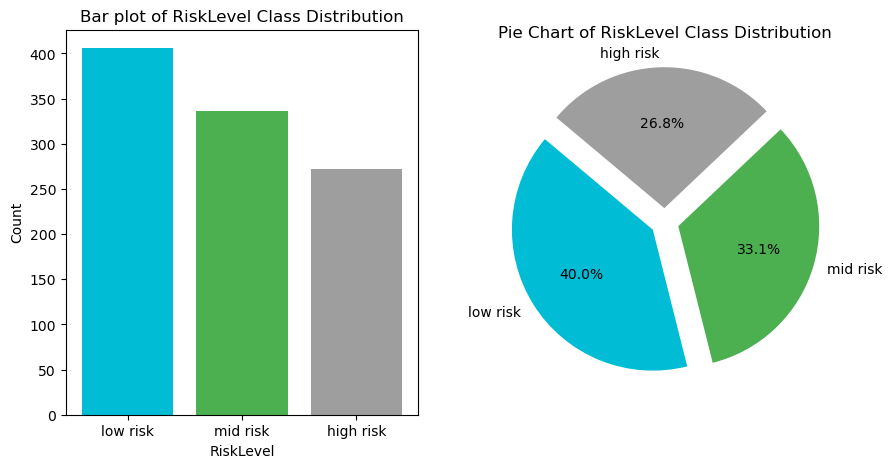

In [13]:
# Calculate the class distribution
class_dis = df['RiskLevel'].value_counts()

#create color tones
colors = ['#00bcd4', '#4caf50', '#9e9e9e']


# create subplots for bar plot and pie chart
fig, ax = plt.subplots(1,2, figsize=(10,5))

# Bar Chart
ax[0].bar(class_dis.index, class_dis.values, color=colors)#['gray', 'darkorange', 'cornflowerblue'])
ax[0].set_title('Bar plot of RiskLevel Class Distribution')
ax[0].set_xlabel('RiskLevel')
ax[0].set_ylabel('Count')


# Pie Chart
ax[1].pie(class_dis.values, labels=class_dis.index, autopct='%1.1f%%', startangle=140, explode=(0.1, 0.1, 0.1),
          colors=colors)#['gray', 'darkorange', 'cornflowerblue'])
ax[1].set_title('Pie Chart of RiskLevel Class Distribution')

# To display plot
plt.show();

***Observation on the RiskLevel Plot***

- The above plots suggest our target variable RiskLevel has low risk of 40%, mid risk of 33.1% and high risk of 26.8%.
This clearly indicates a somwwhat class inbalance among our target variable.

### 3.3. Correlation heat map of the features
- The heatmap is used to visualize the relationship between numerical features in the dataset
- **+1.0:** indicate perfect positive relation. positive values means as one feature increases, the other tends to increase too
- **-1.0:** indicate perfect negative relation. negative values means as one feature increases, the other decrease
- **0.0:** means no relation. suggesting the features has no linear relationship(no dependence)

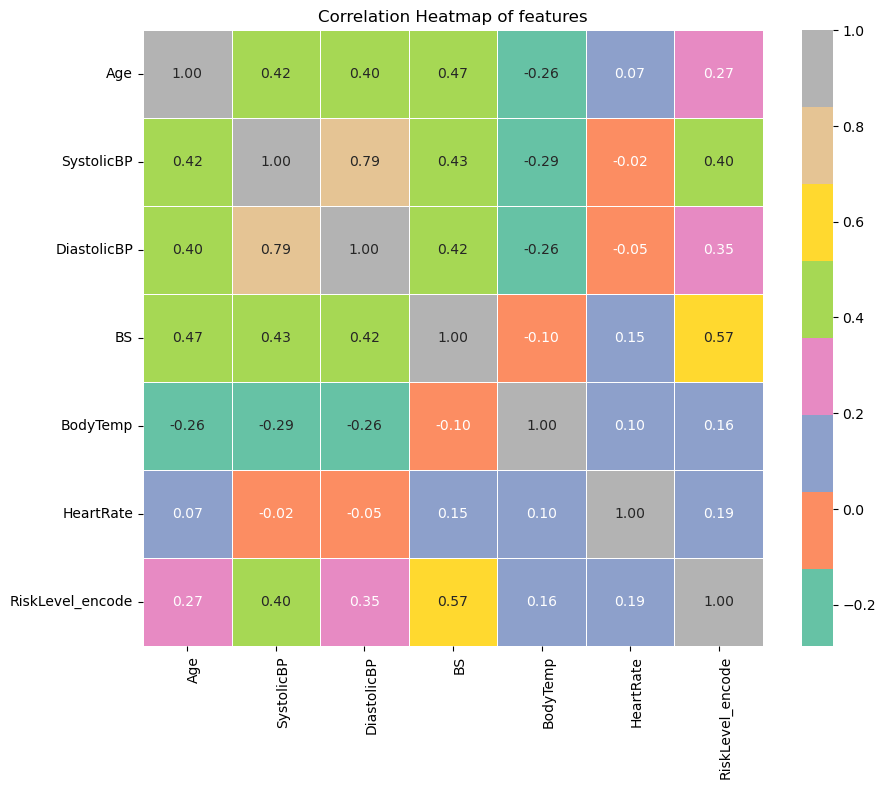

In [14]:
# Calculate the correlation matrix
corr_features = df.drop('RiskLevel', axis=1)
corr_matrix = corr_features.corr()

# set the colors for the heatmap
#custom_palette = sns.diverging_palette(30, 200, s=100, l=50, n=400, center="light")

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap= 'Set2', cbar=True, linewidths=0.5)
plt.xticks(rotation=90, ha='left')
plt.title('Correlation Heatmap of features')
plt.show();



***Corelation heatmap key observations***

- All features have a positive correlation with the target variable **RiskLevel**

- **features with strong positve correlations:**
    - **SystolicBP and DiastolicBP**  
     
- **features with moderate positive correlations:**
    - **Age with SystolicBP, DiastolicBP and BS (0.47)**

- **Low correlation:**
    - **BodyTemp and HeartRate:** shows very low or no correlation with other features, suggesting independence on other features.

### 3.2. 3D of some correlated features

***Plot 1***

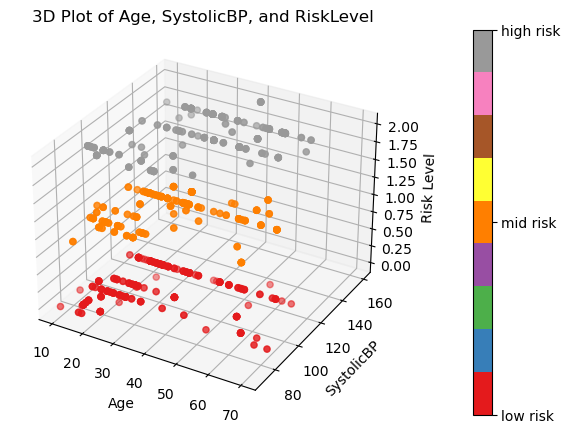

In [15]:
# Selecting features for the plot
feat1 = 'Age'
feat2 = 'SystolicBP'

# Creating the 3D plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data
sc = ax.scatter(df[feat1], df[feat2], df['RiskLevel_encode'], c=df['RiskLevel_encode'], cmap='Set1', marker='o')

# Adding labels and title
ax.set_xlabel(feat1)
ax.set_ylabel(feat2)
ax.set_zlabel('Risk Level')
ax.set_title('3D Plot of Age, SystolicBP, and RiskLevel')

# Adding a color bar
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['low risk', 'mid risk', 'high risk'])

plt.show()


***Plot 2***


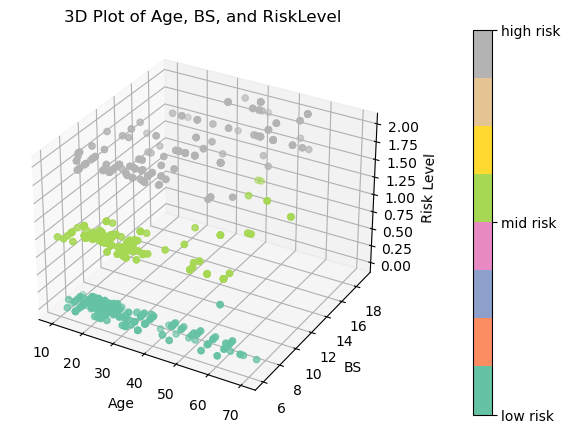

In [16]:
# additional 3D plot
feat3 = 'BS'
# Creating the 3D plot
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

# Plotting the data
sc = ax.scatter(df[feat1], df[feat3], df['RiskLevel_encode'], c=df['RiskLevel_encode'], cmap='Set2', marker='o')

# Adding labels and title
ax.set_xlabel(feat1)
ax.set_ylabel(feat3)
ax.set_zlabel('Risk Level')
ax.set_title('3D Plot of Age, BS, and RiskLevel')

# Adding a color bar
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_ticks([0, 1, 2])
cbar.set_ticklabels(['low risk', 'mid risk', 'high risk'])

plt.show()



***Observations from plots***

Plot 1 and plot 2 shows that risk levels are spread across different ages both younger and older. It further shows that age alone is not a determinate of risk in pregnancy. Instead, the risk level seems to be influenced by a combination of age and other factors such as blood sugar and Blood pressure.
- **High Risk**: Predominantly among higher systolicBP values and also higher Blood sugar thou present across the range of ages.
- **Mid and Low Risk**: shows the same pattern with high risk. Predominant among Lower systolicBP and Blood sugar



### 3.3. Visualizing skewness using Histogram

- **Skewness** measures how evenly spread the bell curve  on data points is on both sides of the median. if the spread is tilted more to the left than the right, it is said to be negatively skew and positively skewed if tilted more to the right than to the left. The data points is said to be zero symmetric if the bell shape have an even distribution on both sides

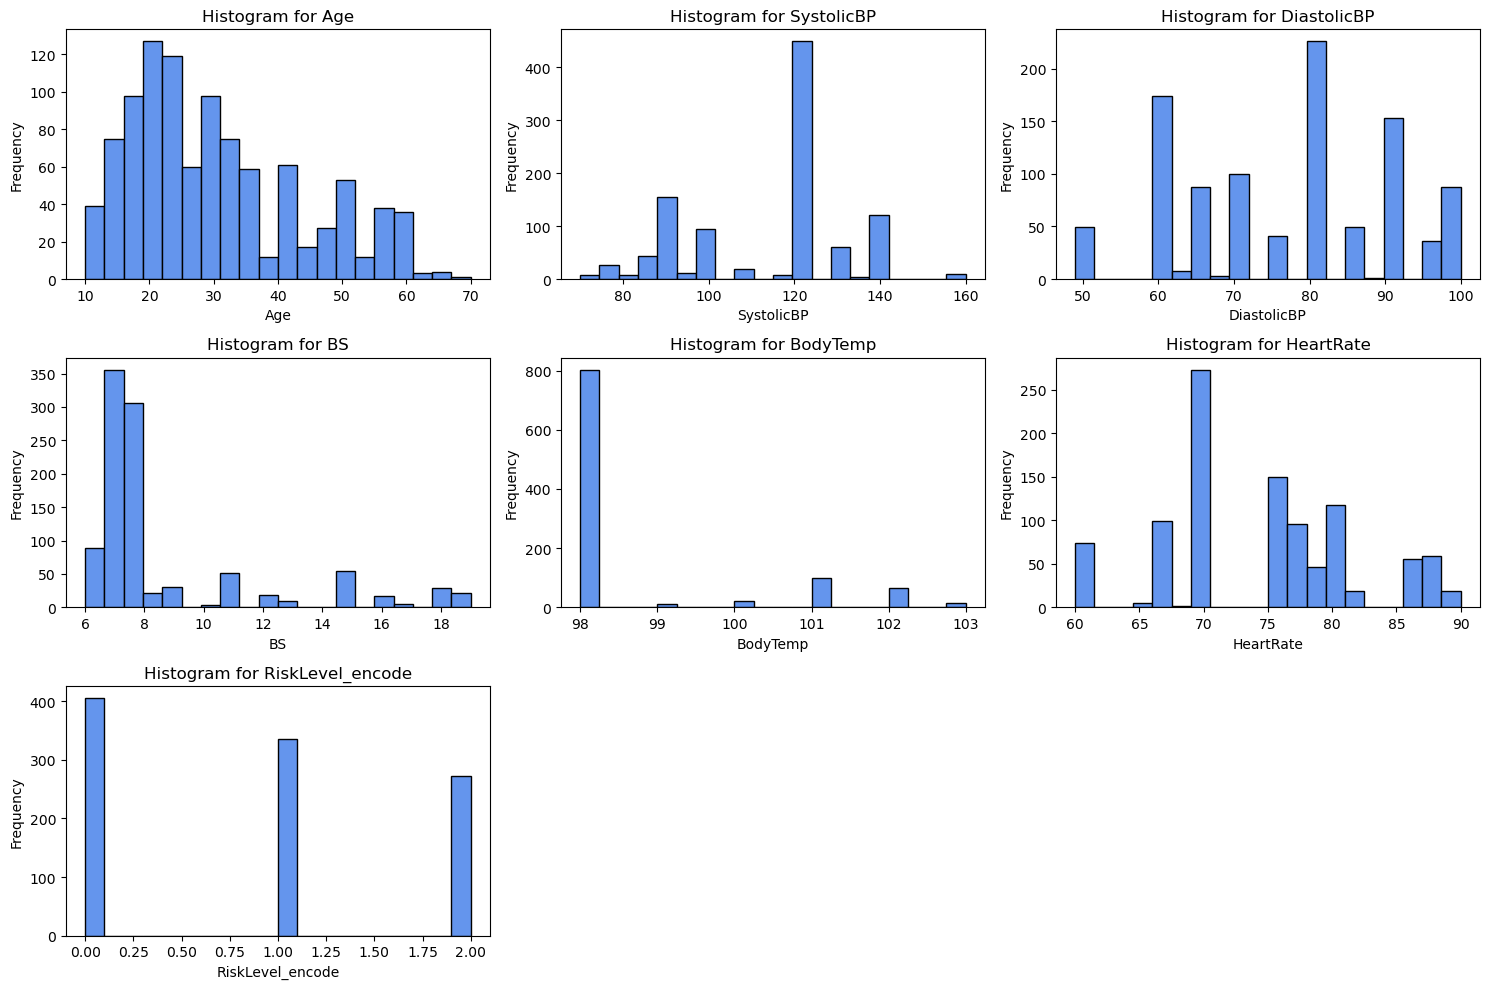

In [17]:
# Visualize skewness using histogram for each numerical feature

num_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[column].dropna(), bins=20, edgecolor='k', color='cornflowerblue')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


***Histogram Observation***


- From the above it is seen that BS and Body Temp are highly skewed. BS and Body Temp are positively skewed.Age is moderately skewed. Diastolic, systolic, and HeartRate are approximately symmetric

### 3.5. Box plot for visualizing presence of outliers

- The presence of outliers in a dataset can significantly impact model performance as extreme values or very low values can affect our model ability to classify instances and potentially leading to poor generalization and bias.

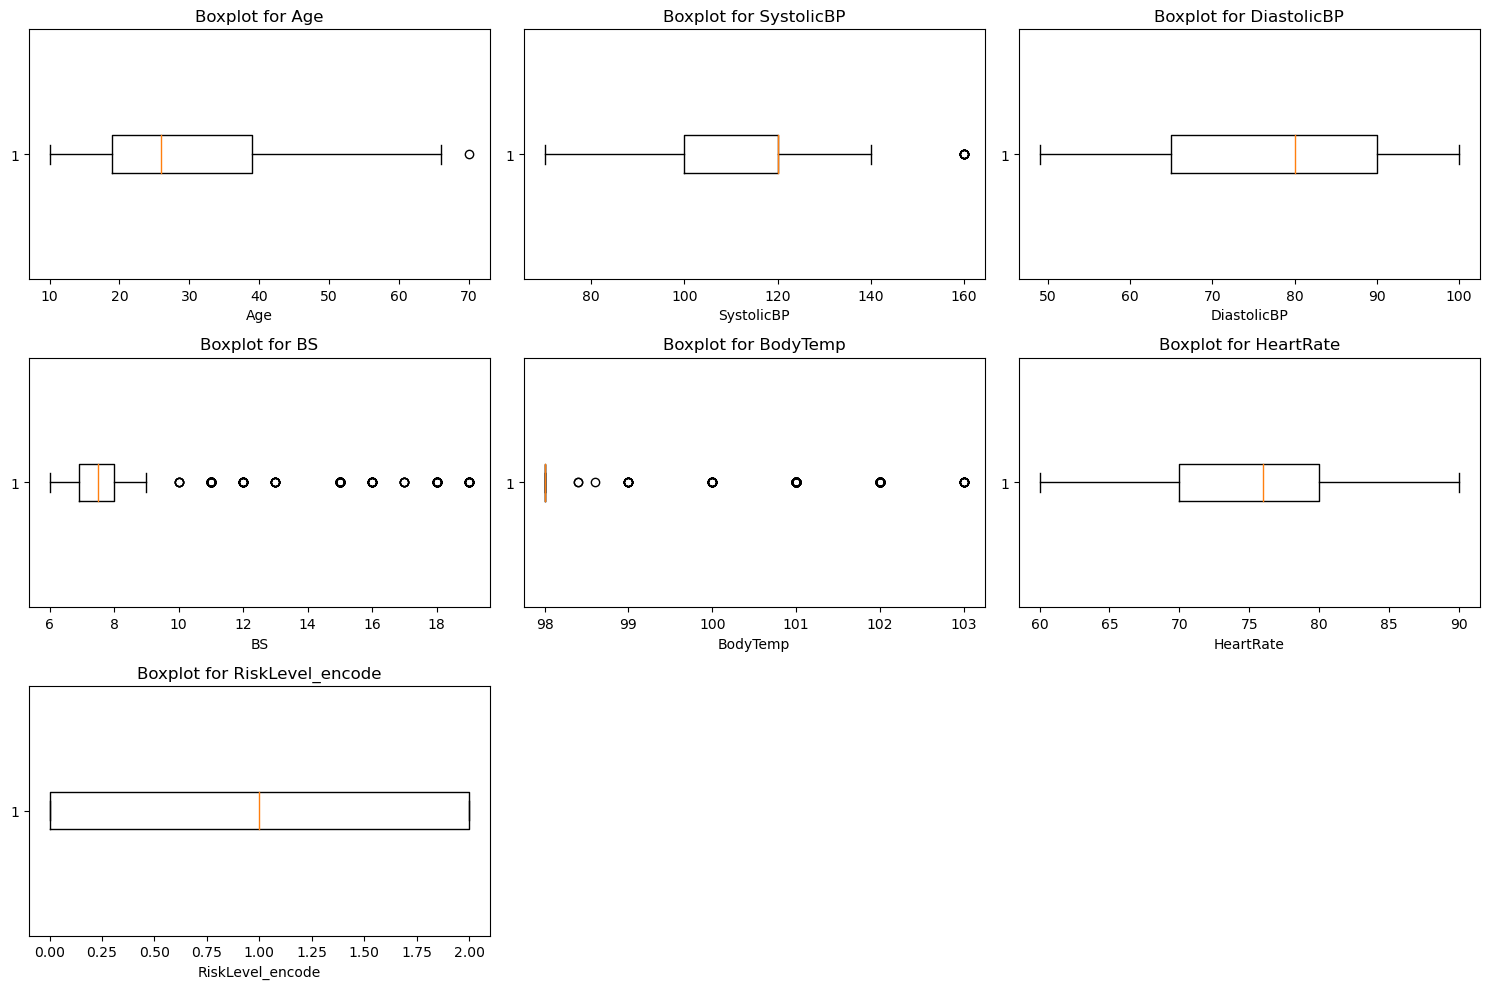

In [18]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df[column].dropna(), vert=False)
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

***Box plot observation***

- BS and BodyTemp have the highest number of outliers, indicating that they contain values that are either extremely high or extremely low compared to the concentration of other data points.

In order to overcome this, we will employ z-score standardization so as to make the distribution close to normal

### 3.4. Pairplot of some correlated features

<Figure size 1000x500 with 0 Axes>

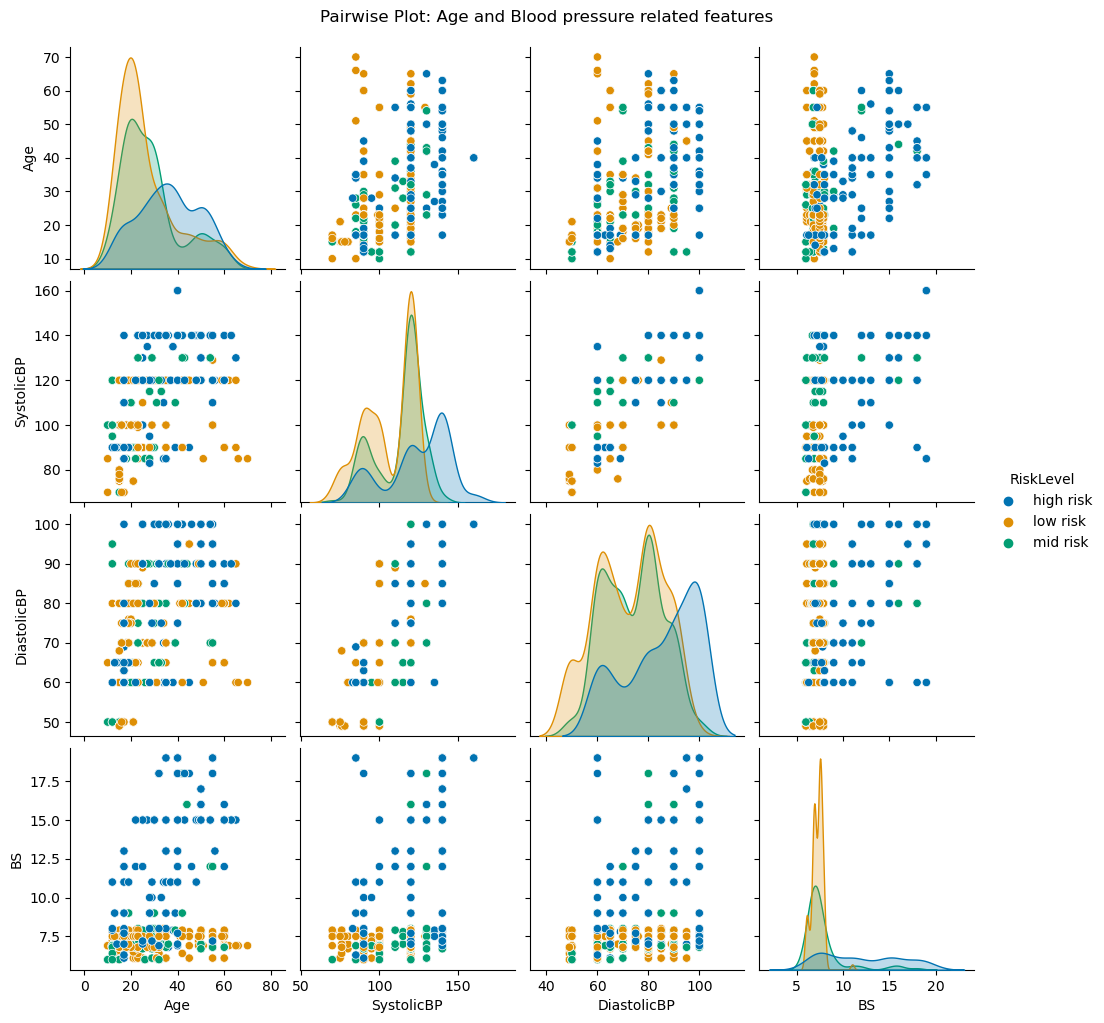

In [19]:
warnings.filterwarnings('ignore')

# Define feature sets
features_1 = ['Age', 'SystolicBP', 'DiastolicBP', 'BS']#'MAP']

# Pairwise plot 
plt.figure(figsize=(10, 5))
sns.pairplot(df, vars=features_1, hue='RiskLevel', palette='colorblind')
plt.suptitle('Pairwise Plot: Age and Blood pressure related features', y=1.02)
plt.show();



***Pair Plot Observation***
- There is a linear relationship between diastolicBP and systolicBP. This shows that as one increase, the other increases too.
- Age has no linear relationship with other features. Suggesting that risk in preganacy is not solely dependent on age but likely influenced by other factors
- The higher the Blood sugar, the more likelihood of a high risk pregnancy

## 4. Feature Engineering
The below feature engineering will be performed. N/B we will still retain our original data as our model building will utilize the original data and transformed data.
- create a new feature called MAP using the systolic and Diastolic BP feature
- Use Box-Cox transofrmation on Age and BS features that are positively skewed to achieve a more Guassian-like distribution.This ensures that our model performance is not adversely influenced by the presence of extreme values causing the positive skewness. Note that we will not transform the BodyTemp features as the data points range is narrow. 

In [20]:
# Make a copy of our original data as we need it for experimenting.
df_or = df.copy()

In [21]:
# Calculate Mean Arterial Pressure (MAP)
df['MAP'] = df['DiastolicBP'] + (1/3) * (df['SystolicBP'] - df['DiastolicBP'])

In [22]:
# Box-Cox transformation 
df['Age_Tr'], _ = boxcox(df['Age'] + 1)  # Adding 1 to handle zero values
df['BS_Tr'], _ = boxcox(df['BS'])

print(df)

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel  \
0      25         130           80  15.0      98.0         86  high risk   
1      35         140           90  13.0      98.0         70  high risk   
2      29          90           70   8.0     100.0         80  high risk   
3      30         140           85   7.0      98.0         70  high risk   
4      35         120           60   6.1      98.0         76   low risk   
...   ...         ...          ...   ...       ...        ...        ...   
1009   22         120           60  15.0      98.0         80  high risk   
1010   55         120           90  18.0      98.0         60  high risk   
1011   35          85           60  19.0      98.0         86  high risk   
1012   43         120           90  18.0      98.0         70  high risk   
1013   32         120           65   6.0     101.0         76   mid risk   

      RiskLevel_encode         MAP    Age_Tr     BS_Tr  
0                    2   96.66

In [23]:
# drop the original transformed features

df_transform = df.drop(['Age','BS'], axis=1)

## 5. Data Preprocessing
- It is essential to preprocess the data so as to ensure that the data is clean, well-formatted, and ready for model training.
This process when carefully done leads to more accurate and reliable results.

- **The following preprocessing will be applied:**
    - **identify and handle anomalies if any**
    - **Feature-target separation**
    - **Encode Categorical features where applicable**
    - **Scale and standardize features**
    - **Split data**
    

### 5.1. Identify and handle anomalies(where applicable)
- it has been established that our data does not contain any missing values. 

### 5.2. Feature-Target Separation
- **The target variable(Y) will be separated from the independent variables(X)**
- The target variable is the output our model will aim to predict.
- The independent variables will be the input our model will use to learn patterns and make predictions.

### 5.3. Encode Categorical features
It is essential for us to transform our categorical data to numerical for easy interpretabilty by our model as most model require numerical input. This ensures that the model can process the data effectively, leading to improved performance and accuracy.Following the mapping of our target variable, we will not perform any new encoding on my target variable

### 5.4. Split Data
- **Train and Test:** Our data will be split into training and testing sets, The training will be used training the model. The test set will be used to evaluate our model's performance on unseen data(test set).
- **Random state:** The random state will be set to a fixed interger. This ensures reproductivity meaning that for every time the code is ran, the split between the training and testing remains the same.
- **Stratification:** stratifying the target variable(y) ensures that the class distribution of the test and train will closely match that of the original data class distribution

### 5.5. Scale and Standardize the independent features(X)
it is important to scale/standardize our data before feeding it to a model as this helps to ensure that all features contribute equally to the model performance and prevents features with larger values to dominate the model learning process. 

## 5. Model building
We will utilize scikit-learn libraries and tensor flow in building our model. 
- **Scikit-learn** will be used in building the selected model
- **Tensor flow** we will use it to build a fastforward neural network model

We will implore 2 methods in buiding our model
- **Method 1** use the original data set
- **Method 2** use the transformed data set

For both methods, the process flow remains the same and that is

1) prepare our data for use in the model
2) train traditional models, select the best performer and hypertune
3) train FNN model
4) combine predictions of the best traditional model and fnn model and train a meta model on it.
5) Evaluate results obtained from (2), (3) and (4). 

Using this two methods, the best model or stage that ticks all evaluation metrics becomes our selected model



### 5.1. Method 1.Using original dataset


### 5.1.1. Train selected traditional models

In [24]:
# perform feature separation

X = df_or.drop(['RiskLevel','RiskLevel_encode'],axis=1)
y = df_or['RiskLevel_encode']

In [25]:
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123, stratify=y)

In [26]:
# instantiate our scaling method
scaler_or = StandardScaler()

# feed the independent variables(X) to our scaler
X_train_or = scaler_or.fit_transform(X_train)
X_test_or = scaler_or.transform(X_test)

In [27]:
# selection of our traditional model

models_or = [[RandomForestClassifier(random_state=42), 'Random Forest'],
               [XGBClassifier(random_state=42), 'XGB Classifier'],
               [ExtraTreesClassifier(random_state=42), 'ET Classifier'],
               [CatBoostClassifier(random_state=42), 'CB Classifier'],
         [lgb.LGBMClassifier(random_state=42),'LGB Classifier']]

In [28]:
# set up evaluation metrics
metrics_or = {'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'ROC AUC Score': []
}

In [29]:
# Run the training loop
for model, model_name in models_or:
    #fit the model
    model.fit(X_train_or, y_train)
   
    #evaluate the model
    pred_or = model.predict(X_test_or)
    
    acc_score_or = accuracy_score(y_test, pred_or)
    pre_score_or = precision_score(y_test, pred_or, average='macro')
    recal_score_or = recall_score(y_test, pred_or, average='macro')
    roc_score_or = roc_auc_score(y_test, model.predict_proba(X_test_or), multi_class='ovr')
    
    # Store metrics
    metrics_or['Model'].append(model_name)
    metrics_or['Accuracy'].append(f"{round(acc_score_or * 100, 2)}%")
    metrics_or['Precision'].append(f"{round(pre_score_or * 100, 2)}%")
    metrics_or['Recall'].append(f"{round(recal_score_or * 100, 2)}%")
    metrics_or['ROC AUC Score'].append(f"{round(roc_score_or * 100, 2)}%")
    
    if model_name != models_or[-1][1]:
        print(f"Evaluated {model_name}")
        
warnings.filterwarnings('ignore', category=UserWarning)

Evaluated Random Forest
Evaluated XGB Classifier
Evaluated ET Classifier
Learning rate set to 0.078286
0:	learn: 1.0504113	total: 160ms	remaining: 2m 40s
1:	learn: 1.0079825	total: 164ms	remaining: 1m 21s
2:	learn: 0.9758851	total: 166ms	remaining: 55.1s
3:	learn: 0.9446884	total: 168ms	remaining: 41.9s
4:	learn: 0.9175699	total: 171ms	remaining: 33.9s
5:	learn: 0.8932205	total: 172ms	remaining: 28.5s
6:	learn: 0.8729507	total: 174ms	remaining: 24.7s
7:	learn: 0.8521010	total: 176ms	remaining: 21.8s
8:	learn: 0.8327517	total: 177ms	remaining: 19.5s
9:	learn: 0.8132963	total: 179ms	remaining: 17.8s
10:	learn: 0.7992688	total: 183ms	remaining: 16.5s
11:	learn: 0.7836890	total: 185ms	remaining: 15.2s
12:	learn: 0.7716959	total: 187ms	remaining: 14.2s
13:	learn: 0.7600952	total: 189ms	remaining: 13.3s
14:	learn: 0.7489627	total: 191ms	remaining: 12.5s
15:	learn: 0.7367291	total: 192ms	remaining: 11.8s
16:	learn: 0.7266932	total: 193ms	remaining: 11.2s
17:	learn: 0.7188279	total: 195ms	rema

240:	learn: 0.3297673	total: 529ms	remaining: 1.66s
241:	learn: 0.3293989	total: 530ms	remaining: 1.66s
242:	learn: 0.3290033	total: 532ms	remaining: 1.66s
243:	learn: 0.3283395	total: 534ms	remaining: 1.65s
244:	learn: 0.3279312	total: 535ms	remaining: 1.65s
245:	learn: 0.3273364	total: 536ms	remaining: 1.64s
246:	learn: 0.3269711	total: 538ms	remaining: 1.64s
247:	learn: 0.3265621	total: 539ms	remaining: 1.64s
248:	learn: 0.3258216	total: 541ms	remaining: 1.63s
249:	learn: 0.3253546	total: 543ms	remaining: 1.63s
250:	learn: 0.3246903	total: 544ms	remaining: 1.62s
251:	learn: 0.3239375	total: 546ms	remaining: 1.62s
252:	learn: 0.3234716	total: 547ms	remaining: 1.61s
253:	learn: 0.3229242	total: 549ms	remaining: 1.61s
254:	learn: 0.3226620	total: 551ms	remaining: 1.61s
255:	learn: 0.3221428	total: 553ms	remaining: 1.61s
256:	learn: 0.3217843	total: 555ms	remaining: 1.6s
257:	learn: 0.3212208	total: 556ms	remaining: 1.6s
258:	learn: 0.3209535	total: 558ms	remaining: 1.59s
259:	learn: 0.

494:	learn: 0.2500896	total: 903ms	remaining: 921ms
495:	learn: 0.2498850	total: 905ms	remaining: 919ms
496:	learn: 0.2497163	total: 907ms	remaining: 918ms
497:	learn: 0.2494735	total: 908ms	remaining: 916ms
498:	learn: 0.2492650	total: 910ms	remaining: 913ms
499:	learn: 0.2490768	total: 911ms	remaining: 911ms
500:	learn: 0.2488652	total: 913ms	remaining: 909ms
501:	learn: 0.2485926	total: 914ms	remaining: 907ms
502:	learn: 0.2484272	total: 916ms	remaining: 905ms
503:	learn: 0.2481290	total: 917ms	remaining: 903ms
504:	learn: 0.2480136	total: 919ms	remaining: 900ms
505:	learn: 0.2479208	total: 920ms	remaining: 898ms
506:	learn: 0.2477067	total: 922ms	remaining: 896ms
507:	learn: 0.2474426	total: 923ms	remaining: 894ms
508:	learn: 0.2472752	total: 925ms	remaining: 892ms
509:	learn: 0.2470935	total: 927ms	remaining: 890ms
510:	learn: 0.2469131	total: 928ms	remaining: 888ms
511:	learn: 0.2467042	total: 929ms	remaining: 886ms
512:	learn: 0.2464742	total: 931ms	remaining: 884ms
513:	learn: 

705:	learn: 0.2193912	total: 1.3s	remaining: 542ms
706:	learn: 0.2193385	total: 1.3s	remaining: 540ms
707:	learn: 0.2192310	total: 1.3s	remaining: 538ms
708:	learn: 0.2191283	total: 1.31s	remaining: 536ms
709:	learn: 0.2190552	total: 1.31s	remaining: 534ms
710:	learn: 0.2189862	total: 1.31s	remaining: 532ms
711:	learn: 0.2188963	total: 1.31s	remaining: 530ms
712:	learn: 0.2187954	total: 1.31s	remaining: 528ms
713:	learn: 0.2187488	total: 1.31s	remaining: 527ms
714:	learn: 0.2186167	total: 1.31s	remaining: 525ms
715:	learn: 0.2185469	total: 1.32s	remaining: 523ms
716:	learn: 0.2184759	total: 1.32s	remaining: 521ms
717:	learn: 0.2183943	total: 1.32s	remaining: 519ms
718:	learn: 0.2182287	total: 1.32s	remaining: 517ms
719:	learn: 0.2181640	total: 1.32s	remaining: 515ms
720:	learn: 0.2180408	total: 1.32s	remaining: 513ms
721:	learn: 0.2179851	total: 1.33s	remaining: 511ms
722:	learn: 0.2178616	total: 1.33s	remaining: 509ms
723:	learn: 0.2176856	total: 1.33s	remaining: 507ms
724:	learn: 0.2

976:	learn: 0.1999479	total: 1.68s	remaining: 39.6ms
977:	learn: 0.1999028	total: 1.68s	remaining: 37.8ms
978:	learn: 0.1998553	total: 1.68s	remaining: 36.1ms
979:	learn: 0.1998315	total: 1.69s	remaining: 34.4ms
980:	learn: 0.1997278	total: 1.69s	remaining: 32.7ms
981:	learn: 0.1997127	total: 1.69s	remaining: 30.9ms
982:	learn: 0.1996728	total: 1.69s	remaining: 29.2ms
983:	learn: 0.1996058	total: 1.69s	remaining: 27.5ms
984:	learn: 0.1995714	total: 1.69s	remaining: 25.8ms
985:	learn: 0.1994865	total: 1.69s	remaining: 24.1ms
986:	learn: 0.1994641	total: 1.7s	remaining: 22.3ms
987:	learn: 0.1994462	total: 1.7s	remaining: 20.6ms
988:	learn: 0.1993786	total: 1.7s	remaining: 18.9ms
989:	learn: 0.1993396	total: 1.7s	remaining: 17.2ms
990:	learn: 0.1993113	total: 1.7s	remaining: 15.5ms
991:	learn: 0.1992742	total: 1.7s	remaining: 13.7ms
992:	learn: 0.1992101	total: 1.71s	remaining: 12ms
993:	learn: 0.1991843	total: 1.71s	remaining: 10.3ms
994:	learn: 0.1991304	total: 1.71s	remaining: 8.59ms
9

In [30]:
# Create DataFrame from metrics dictionary
metrics_or_df = pd.DataFrame(metrics_or)

metrics_or_df

,Model,Accuracy,Precision,Recall,ROC AUC Score
0,Random Forest,87.19%,87.45%,87.34%,96.59%
1,XGB Classifier,86.21%,86.33%,86.26%,96.7%
2,ET Classifier,85.71%,85.66%,86.02%,96.07%
3,CB Classifier,86.7%,86.89%,86.82%,96.41%
4,LGB Classifier,86.7%,86.54%,86.84%,96.16%


***Observation from traditional model building using original data***
- Random Forest classifier emerged as the best performed model. 

In [31]:
# Define the hyperparameter space
param_rf = {
   'n_estimators': Integer(10, 200),                # Number of trees in the forest
    'max_depth': Integer(1, 50),                     # Maximum depth of the trees
    'min_samples_split': Integer(2, 20),              # Minimum number of samples required to split an internal node
    'min_samples_leaf': Integer(1, 20),               # Minimum number of samples required to be at a leaf node
    'max_features': Real(0.1, 1.0, prior='uniform')  # Number of features to consider when looking for the best split
}

In [32]:
# Create the BayesSearchCV object
bayes_rf=BayesSearchCV(
    estimator=RandomForestClassifier(),
    search_spaces=param_rf,
    n_iter=100,  # Number of iterations
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),       # Number of cross-validation folds
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    random_state=42
)

In [33]:
# Fit the optimizer
rf_fit =bayes_rf.fit(X_train_or, y_train)

In [34]:
# Get the best parameters and best score
best_params_rf = rf_fit.best_params_
best_score_rf = rf_fit.best_score_

print(f"Best Parameters: {best_params_rf}")
print(f"Best Cross-Validation Accuracy: {best_score_rf:.4f}")

Best Parameters: OrderedDict([('max_depth', 48), ('max_features', 0.9664782341098318), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 158)])
Best Cross-Validation Accuracy: 0.8336


In [35]:
# Train the final model with the best parameters
model_rf_or = RandomForestClassifier(**best_params_rf, random_state=42)
model_rf_or.fit(X_train_or, y_train)

RandomForestClassifier(max_depth=48, max_features=0.9664782341098318,
                       n_estimators=158, random_state=42)

In [36]:
#Predict on the train set
rf_train_pred = model_rf_or.predict(X_train_or)

#get training prediction probabilities
rf_train_prob = model_rf_or.predict_proba(X_train_or)

# Predict on the test set
rf_test_pred = model_rf_or.predict(X_test_or)

#get prediction probabilities
rf_test_prob = model_rf_or.predict_proba(X_test_or)



In [37]:
#Evaluate the model performance
rf_classification_rep = classification_report(y_test, rf_test_pred)
rf_auc = roc_auc_score(pd.get_dummies(y_test), rf_test_prob, multi_class='ovo', average='macro')

print("Classification Report:Random Forest Classifier on Original Data")
print(rf_classification_rep)
print("AUC score: Random Forest Classifier on Original Data")
print(rf_auc)

Classification Report:Random Forest Classifier on Original Data
              precision    recall  f1-score   support

           0       0.90      0.89      0.89        81
           1       0.87      0.91      0.89        67
           2       0.91      0.87      0.89        55

    accuracy                           0.89       203
   macro avg       0.89      0.89      0.89       203
weighted avg       0.89      0.89      0.89       203

AUC score: Random Forest Classifier on Original Data
0.9693392599583279


### 5.1.2. Build FNN model

In [38]:
# Set the random seed for reproducibility
random_seed = 42
#np.random.seed(random_seed)
tf.random.set_seed(random_seed)

def build_fnn(input_shape):
    model = tf.keras.models.Sequential()
    
    # Input layer and first hidden layer
    model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=(input_shape,), kernel_regularizer=l2(0.0001)))
    model.add(tf.keras.layers.Dropout(0.2))  
    
    # Second hidden layer
    model.add(tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=l2(0.0001)))
    model.add(tf.keras.layers.Dropout(0.2))  
    
    # Third hidden layer
    model.add(tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=l2(0.0001)))
    model.add(tf.keras.layers.Dropout(0.2))  
    
    # Output layer for multiclass classification
    model.add(tf.keras.layers.Dense(3, activation='softmax')) 

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    return model


In [39]:
# Train on the fnn model
'''fnn_model_or = build_fnn(X_train_or.shape[1])
history_or = fnn_model_or.fit(X_train_or, y_train, epochs=400, batch_size=32, 
                              validation_data =(X_test_or,y_test), verbose=2)'''

'fnn_model_or = build_fnn(X_train_or.shape[1])\nhistory_or = fnn_model_or.fit(X_train_or, y_train, epochs=400, batch_size=32, \n                              validation_data =(X_test_or,y_test), verbose=2)'

In [40]:
# Plot training & validation accuracy values
'''plt.figure(figsize=(10, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_or.history['accuracy'], label='Training Accuracy', marker='o', linestyle='-', markersize=2)
plt.plot(history_or.history['val_accuracy'], label='Validation Accuracy', marker='o', linestyle='-', markersize=2)
plt.title('Training and Validation Accuracy on Original Data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_or.history['loss'], label='Training Loss', marker='o', linestyle='-', markersize=2)
plt.plot(history_or.history['val_loss'], label='Validation Loss', marker='o', linestyle='-', markersize=2)
plt.title('Training and Validation Loss on Original Data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()'''

"plt.figure(figsize=(10, 5))\n\n# Plot Accuracy\nplt.subplot(1, 2, 1)\nplt.plot(history_or.history['accuracy'], label='Training Accuracy', marker='o', linestyle='-', markersize=2)\nplt.plot(history_or.history['val_accuracy'], label='Validation Accuracy', marker='o', linestyle='-', markersize=2)\nplt.title('Training and Validation Accuracy on Original Data')\nplt.xlabel('Epochs')\nplt.ylabel('Accuracy')\nplt.legend()\nplt.grid(True)\n\n# Plot Loss\nplt.subplot(1, 2, 2)\nplt.plot(history_or.history['loss'], label='Training Loss', marker='o', linestyle='-', markersize=2)\nplt.plot(history_or.history['val_loss'], label='Validation Loss', marker='o', linestyle='-', markersize=2)\nplt.title('Training and Validation Loss on Original Data')\nplt.xlabel('Epochs')\nplt.ylabel('Loss')\nplt.legend()\nplt.grid(True)\n\nplt.tight_layout()\nplt.show()"

In [41]:
# Save the trained model
#fnn_model_or = fnn_model_or.save('fnn_model_or.keras')

In [42]:
# Load the saved model
fnn_model_or = load_model('fnn_model_or.keras')

In [43]:
#Get training predictions probabilities
fnn_train_pred_or = fnn_model_or.predict(X_train_or)

#convert training predictions to classes
fnn_train_prob_or = np.argmax(fnn_train_pred_or, axis=1)

# Get test predictions probabilities
fnn_test_pred_or = fnn_model_or.predict(X_test_or) 

# convert prediction to classes
fnn_test_prob_or = np.argmax(fnn_test_pred_or, axis=1) 


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [44]:
#Evaluate the model performance
fnn_classification_rep_or = classification_report(y_test, fnn_test_prob_or)
fnn_auc = roc_auc_score(pd.get_dummies(y_test), fnn_test_pred_or, multi_class='ovo', average='macro')

print("Classification Report:FNN model on the Original Data")
print(fnn_classification_rep_or)
print("AUC score: FNN model on the Original Data")
print(fnn_auc)

Classification Report:FNN model on the Original Data
              precision    recall  f1-score   support

           0       0.69      0.88      0.77        81
           1       0.69      0.46      0.55        67
           2       0.82      0.82      0.82        55

    accuracy                           0.72       203
   macro avg       0.73      0.72      0.71       203
weighted avg       0.72      0.72      0.71       203

AUC score: FNN model on the Original Data
0.8838755284601431


### 5.1.3. Ensemble predictions of the RF and FNN model and Evaluate 

In [45]:
# Make a dataframe of FNN predictions
fnn_predictions_or = pd.DataFrame(fnn_test_pred_or, columns=['Score_0', 'Score_1', 'Score_2'])
fnn_predictions_or['Label'] = fnn_predictions_or.idxmax(axis=1).str.replace('Score_', '').astype(int)

In [46]:
# Make a dataframe of RF predictions
rf_pred_df = pd.DataFrame(rf_test_pred, columns=['Label'])

# Make a dataframe of probabilities
rf_prob_df = pd.DataFrame(rf_test_prob, columns=['Score_0', 'Score_1', 'Score_2'])

# Concatenate the predictions and probabilities DataFrames
rf_predictions_or = pd.concat([rf_pred_df, rf_prob_df], axis=1)

In [47]:
#Ensure both predictions DataFrames have the same index
rf_predictions_or = rf_predictions_or.reset_index(drop=True)
fnn_predictions_or = fnn_predictions_or.reset_index(drop=True)

In [48]:
# Extract necessary columns for probabilities
rf_probs = rf_predictions_or[['Score_0', 'Score_1', 'Score_2']]
fnn_probs = fnn_predictions_or[['Score_0', 'Score_1', 'Score_2']]

In [49]:
# Average the probabilities from both models
ensemble_probs = (rf_probs.values + fnn_probs.values) / 2

# Check that the combined probabilities sum to 1
assert np.allclose(ensemble_probs.sum(axis=1), 1), "Probabilities should sum to 1 for each sample"

# Determine the final predicted class based on the maximum combined probability
ensemble_pred = np.argmax(ensemble_probs, axis=1)

In [50]:
# Evaluate the model on our unseen data(y_test)
ensemble_classification_rep = classification_report(y_test, ensemble_pred)
ensemble_auc = roc_auc_score(pd.get_dummies(y_test), ensemble_probs, multi_class='ovo', average='macro')


print("Classification Report:Ensemble predictions of FNN and RF On original data using soft voting")
print(ensemble_classification_rep)
print("AUC score: Ensemble predictions on Original Data")
print(ensemble_auc)


Classification Report:Ensemble predictions of FNN and RF On original data using soft voting
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        81
           1       0.81      0.84      0.82        67
           2       0.92      0.85      0.89        55

    accuracy                           0.86       203
   macro avg       0.86      0.86      0.86       203
weighted avg       0.86      0.86      0.86       203

AUC score: Ensemble predictions on Original Data
0.9615796269738869


### 5.1.4. Ensemble predictions of train and test data and use it as features and train a meta model

In [51]:
# Combine the predictions from base models for training data
X_train_meta_or = np.column_stack([rf_train_prob, fnn_train_pred_or])
y_train_meta_or = y_train  # Target labels for the meta-model

# Combine predictions from base models for test data
X_test_meta_or = np.column_stack([rf_test_prob, fnn_test_pred_or])

In [52]:
# selection of our meta model

models_meta_or = [[LogisticRegression(random_state=42), 'Logistic Regression'],
               [XGBClassifier(random_state=42), 'XGB Classifier'],
               [ExtraTreesClassifier(random_state=42), 'ET Classifier'],
               [SVC(probability=True,random_state=42), 'SVC']]

In [53]:
# set up evaluation metrics
metrics_meta_or = {'Model_meta': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'ROC AUC Score': []
}

In [54]:
# Run the training loop
for model_meta, model_name_meta in models_meta_or:
    #fit the model
    model_meta.fit(X_train_meta_or, y_train_meta_or)
   
    #evaluate the model
    pred_meta_or = model_meta.predict(X_test_meta_or)
    
    acc_score_meta_or = accuracy_score(y_test, pred_meta_or)
    pre_score_meta_or = precision_score(y_test, pred_meta_or, average='macro')
    recal_score_meta_or = recall_score(y_test, pred_meta_or, average='macro')
    roc_score_meta_or = roc_auc_score(y_test, model_meta.predict_proba(X_test_meta_or), multi_class='ovr')
    
    # Store metrics
    metrics_meta_or['Model_meta'].append(model_name_meta)
    metrics_meta_or['Accuracy'].append(f"{round(acc_score_meta_or * 100, 2)}%")
    metrics_meta_or['Precision'].append(f"{round(pre_score_meta_or * 100, 2)}%")
    metrics_meta_or['Recall'].append(f"{round(recal_score_meta_or * 100, 2)}%")
    metrics_meta_or['ROC AUC Score'].append(f"{round(roc_score_meta_or * 100, 2)}%")
    
    if model_name_meta != models_meta_or[-1][1]:
        print(f"Evaluated {model_name_meta}")

warnings.filterwarnings('ignore', category=UserWarning)

Evaluated Logistic Regression
Evaluated XGB Classifier
Evaluated ET Classifier


In [55]:
# Create DataFrame from metrics dictionary
metrics_meta_or_df = pd.DataFrame(metrics_meta_or)

metrics_meta_or_df

,Model_meta,Accuracy,Precision,Recall,ROC AUC Score
0,Logistic Regression,88.18%,88.38%,88.07%,97.14%
1,XGB Classifier,86.7%,86.82%,86.84%,97.11%
2,ET Classifier,88.18%,88.38%,88.07%,96.72%
3,SVC,87.19%,87.17%,87.42%,94.2%


In [56]:
# Define the hyperparameter space for the best performed meta-model
param_meta = {
    'C': Real(1e-6, 1e+6, prior='log-uniform'),
    'solver': Categorical(['lbfgs', 'liblinear'])
}



In [57]:
# Set up the BayesSearchCV
bayes_meta = BayesSearchCV(
    estimator=LogisticRegression(),
    search_spaces=param_meta,
    n_iter=100,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    n_jobs=-1,
    scoring='accuracy',
    random_state=42
)

In [58]:
# Fit the model
best_meta_or = bayes_meta.fit(X_train_meta_or, y_train_meta_or)

In [59]:
# Get the best parameters and best score
best_params_meta = best_meta_or.best_params_
best_score_meta = best_meta_or.best_score_

print(f"Best Parameters: {best_params_meta}")
print(f"Best Cross-Validation Accuracy: {best_score_meta:.4f}")

Best Parameters: OrderedDict([('C', 1.1669003191387912), ('solver', 'lbfgs')])
Best Cross-Validation Accuracy: 0.9224


In [60]:
#Re-initialise the model using the best parametr found
final_model_meta = LogisticRegression(**best_params_meta)
final_model_meta.fit(X_train_meta_or, y_train_meta_or)

LogisticRegression(C=1.1669003191387912)

In [61]:
# Predict on the test set
y_pred_meta_or = final_model_meta.predict(X_test_meta_or)
y_prob_meta_or = final_model_meta.predict_proba(X_test_meta_or)


In [62]:
# Evaluate on the unseen data
meta_classification_rep = classification_report(y_test, y_pred_meta_or)
meta_auc = roc_auc_score(pd.get_dummies(y_test), y_prob_meta_or, multi_class='ovo', average='macro')


print("Classification Report:Meta Model(Logistic regression) on stacked predictions of FNN and RF on the Original data")
print(meta_classification_rep)
print("AUC score: Logistic regression on stacked predictions of FNN and RF on the Original Data")
print(meta_auc)

Classification Report:Meta Model(Logistic regression) on stacked predictions of FNN and RF on the Original data
              precision    recall  f1-score   support

           0       0.88      0.89      0.88        81
           1       0.87      0.88      0.87        67
           2       0.91      0.87      0.89        55

    accuracy                           0.88       203
   macro avg       0.88      0.88      0.88       203
weighted avg       0.88      0.88      0.88       203

AUC score: Logistic regression on stacked predictions of FNN and RF on the Original Data
0.9714423147322536


### 5.2. Method 2. Using transformed data set

### 5.2.1. Train selected traditional models on the transformed data

In [63]:
# perform feature separation

X_tr = df_transform.drop(['RiskLevel','RiskLevel_encode','BodyTemp'],axis=1)
y_tr = df_transform['RiskLevel_encode']

In [64]:
# Split the transformed data 
X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(X_tr, y_tr, test_size=0.20, random_state=123, stratify=y_tr)

In [65]:
# instantiate our scaling method
scaler_tr = StandardScaler()

# feed the independent variables(X) to our scaler
X_train_tr_sca = scaler_tr.fit_transform(X_train_tr)
X_test_tr_sca = scaler_tr.transform(X_test_tr)

In [66]:
# selection of our traditional model

model_tr = [[RandomForestClassifier(random_state=42), 'Random Forest'],
               [XGBClassifier(random_state=42), 'XGB Classifier'],
               [ExtraTreesClassifier(random_state=42), 'ET Classifier'],
               [CatBoostClassifier(random_state=42), 'CB Classifier'],
         [lgb.LGBMClassifier(random_state=42),'LGB Classifier']]

In [67]:
metrics_tr = {'Model_tr': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'ROC AUC Score': []
}

In [68]:
warnings.filterwarnings('ignore')

# Run the training loop
for models_tr, model_name_tr in model_tr:
    #fit the model
    models_tr.fit(X_train_tr_sca, y_train_tr)
   
    #evaluate the model
    pred_tr = models_tr.predict(X_test_tr_sca)
    
    acc_score_tr = accuracy_score(y_test_tr, pred_tr)
    pre_score_tr = precision_score(y_test_tr, pred_tr, average='macro')
    recal_score_tr = recall_score(y_test_tr, pred_tr, average='macro')
    roc_score_tr = roc_auc_score(y_test_tr, models_tr.predict_proba(X_test_tr_sca), multi_class='ovr')
    
    # Store metrics
    metrics_tr['Model_tr'].append(model_name_tr)
    metrics_tr['Accuracy'].append(f"{round(acc_score_tr * 100, 2)}%")
    metrics_tr['Precision'].append(f"{round(pre_score_tr * 100, 2)}%")
    metrics_tr['Recall'].append(f"{round(recal_score_tr * 100, 2)}%")
    metrics_tr['ROC AUC Score'].append(f"{round(roc_score_tr * 100, 2)}%")
    
    if model_name_tr != model_tr[-1][1]:
        print(f"Evaluated {model_name_tr}")

Evaluated Random Forest
Evaluated XGB Classifier
Evaluated ET Classifier
Learning rate set to 0.078286
0:	learn: 1.0540592	total: 2.12ms	remaining: 2.12s
1:	learn: 1.0167525	total: 3.96ms	remaining: 1.98s
2:	learn: 0.9841566	total: 5.88ms	remaining: 1.95s
3:	learn: 0.9553527	total: 7.86ms	remaining: 1.96s
4:	learn: 0.9259966	total: 9.89ms	remaining: 1.97s
5:	learn: 0.9036507	total: 11.7ms	remaining: 1.94s
6:	learn: 0.8835938	total: 14ms	remaining: 1.98s
7:	learn: 0.8657794	total: 16.2ms	remaining: 2.01s
8:	learn: 0.8476961	total: 20.2ms	remaining: 2.22s
9:	learn: 0.8292015	total: 23.7ms	remaining: 2.34s
10:	learn: 0.8156747	total: 25.3ms	remaining: 2.27s
11:	learn: 0.7990233	total: 27ms	remaining: 2.23s
12:	learn: 0.7869975	total: 28.6ms	remaining: 2.17s
13:	learn: 0.7764624	total: 30.1ms	remaining: 2.12s
14:	learn: 0.7654193	total: 31.7ms	remaining: 2.08s
15:	learn: 0.7538422	total: 33.4ms	remaining: 2.05s
16:	learn: 0.7435957	total: 34.9ms	remaining: 2.02s
17:	learn: 0.7360627	total:

183:	learn: 0.3872938	total: 350ms	remaining: 1.55s
184:	learn: 0.3864188	total: 352ms	remaining: 1.55s
185:	learn: 0.3857275	total: 354ms	remaining: 1.55s
186:	learn: 0.3849253	total: 355ms	remaining: 1.54s
187:	learn: 0.3839902	total: 356ms	remaining: 1.54s
188:	learn: 0.3832205	total: 358ms	remaining: 1.54s
189:	learn: 0.3826089	total: 360ms	remaining: 1.53s
190:	learn: 0.3817988	total: 361ms	remaining: 1.53s
191:	learn: 0.3810827	total: 363ms	remaining: 1.53s
192:	learn: 0.3805188	total: 364ms	remaining: 1.52s
193:	learn: 0.3796080	total: 366ms	remaining: 1.52s
194:	learn: 0.3784792	total: 368ms	remaining: 1.52s
195:	learn: 0.3777594	total: 369ms	remaining: 1.51s
196:	learn: 0.3771363	total: 371ms	remaining: 1.51s
197:	learn: 0.3761366	total: 372ms	remaining: 1.51s
198:	learn: 0.3754852	total: 374ms	remaining: 1.51s
199:	learn: 0.3746490	total: 376ms	remaining: 1.5s
200:	learn: 0.3736987	total: 378ms	remaining: 1.5s
201:	learn: 0.3727092	total: 380ms	remaining: 1.5s
202:	learn: 0.3

429:	learn: 0.2738088	total: 728ms	remaining: 965ms
430:	learn: 0.2735418	total: 731ms	remaining: 965ms
431:	learn: 0.2733401	total: 733ms	remaining: 964ms
432:	learn: 0.2730824	total: 735ms	remaining: 962ms
433:	learn: 0.2728406	total: 737ms	remaining: 961ms
434:	learn: 0.2725526	total: 738ms	remaining: 959ms
435:	learn: 0.2724135	total: 740ms	remaining: 957ms
436:	learn: 0.2722146	total: 742ms	remaining: 955ms
437:	learn: 0.2719767	total: 743ms	remaining: 954ms
438:	learn: 0.2717180	total: 745ms	remaining: 952ms
439:	learn: 0.2715545	total: 746ms	remaining: 950ms
440:	learn: 0.2711452	total: 748ms	remaining: 948ms
441:	learn: 0.2708903	total: 750ms	remaining: 946ms
442:	learn: 0.2706244	total: 752ms	remaining: 945ms
443:	learn: 0.2702670	total: 753ms	remaining: 943ms
444:	learn: 0.2700526	total: 755ms	remaining: 941ms
445:	learn: 0.2697416	total: 756ms	remaining: 939ms
446:	learn: 0.2692761	total: 757ms	remaining: 937ms
447:	learn: 0.2691959	total: 759ms	remaining: 935ms
448:	learn: 

662:	learn: 0.2305554	total: 1.11s	remaining: 562ms
663:	learn: 0.2304278	total: 1.11s	remaining: 561ms
664:	learn: 0.2302383	total: 1.11s	remaining: 560ms
665:	learn: 0.2301163	total: 1.11s	remaining: 558ms
666:	learn: 0.2299257	total: 1.11s	remaining: 557ms
667:	learn: 0.2298312	total: 1.12s	remaining: 555ms
668:	learn: 0.2297374	total: 1.12s	remaining: 553ms
669:	learn: 0.2296553	total: 1.12s	remaining: 552ms
670:	learn: 0.2295917	total: 1.12s	remaining: 550ms
671:	learn: 0.2294479	total: 1.12s	remaining: 549ms
672:	learn: 0.2293695	total: 1.13s	remaining: 547ms
673:	learn: 0.2293051	total: 1.13s	remaining: 546ms
674:	learn: 0.2291477	total: 1.13s	remaining: 544ms
675:	learn: 0.2290009	total: 1.13s	remaining: 543ms
676:	learn: 0.2289272	total: 1.13s	remaining: 541ms
677:	learn: 0.2288202	total: 1.14s	remaining: 539ms
678:	learn: 0.2286795	total: 1.14s	remaining: 537ms
679:	learn: 0.2286269	total: 1.14s	remaining: 536ms
680:	learn: 0.2285375	total: 1.14s	remaining: 534ms
681:	learn: 

900:	learn: 0.2088225	total: 1.48s	remaining: 163ms
901:	learn: 0.2087446	total: 1.48s	remaining: 161ms
902:	learn: 0.2086520	total: 1.49s	remaining: 160ms
903:	learn: 0.2085503	total: 1.49s	remaining: 158ms
904:	learn: 0.2085024	total: 1.49s	remaining: 156ms
905:	learn: 0.2084322	total: 1.49s	remaining: 155ms
906:	learn: 0.2083924	total: 1.49s	remaining: 153ms
907:	learn: 0.2083489	total: 1.49s	remaining: 151ms
908:	learn: 0.2083011	total: 1.5s	remaining: 150ms
909:	learn: 0.2082478	total: 1.5s	remaining: 148ms
910:	learn: 0.2081825	total: 1.5s	remaining: 147ms
911:	learn: 0.2080861	total: 1.5s	remaining: 145ms
912:	learn: 0.2079980	total: 1.54s	remaining: 147ms
913:	learn: 0.2079614	total: 1.54s	remaining: 145ms
914:	learn: 0.2079232	total: 1.54s	remaining: 143ms
915:	learn: 0.2078352	total: 1.55s	remaining: 142ms
916:	learn: 0.2077156	total: 1.55s	remaining: 140ms
917:	learn: 0.2076734	total: 1.55s	remaining: 139ms
918:	learn: 0.2075519	total: 1.56s	remaining: 137ms
919:	learn: 0.20

In [69]:
# Create DataFrame from metrics dictionary
metrics_df_tr = pd.DataFrame(metrics_tr)

metrics_df_tr

,Model_tr,Accuracy,Precision,Recall,ROC AUC Score
0,Random Forest,90.64%,90.6%,90.78%,96.39%
1,XGB Classifier,87.68%,87.73%,88.05%,96.86%
2,ET Classifier,88.18%,88.22%,88.46%,96.01%
3,CB Classifier,87.19%,87.34%,87.23%,96.32%
4,LGB Classifier,87.19%,87.19%,87.47%,96.46%


In [70]:
# using optimization to fit our random forest

rf_fit_tr = bayes_rf.fit(X_train_tr_sca, y_train_tr)

In [71]:
# Get the best parameters and best score
best_params_rf_tr = rf_fit_tr.best_params_
best_score_rf_tr = rf_fit_tr.best_score_

print(f"Best Parameters: {best_params_rf_tr}")
print(f"Best Cross-Validation Accuracy: {best_score_rf_tr:.4f}")

Best Parameters: OrderedDict([('max_depth', 15), ('max_features', 0.36995989874019886), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 189)])
Best Cross-Validation Accuracy: 0.8262


In [72]:
# Train the final model with the best parameters
model_rf_tr = RandomForestClassifier(**best_params_rf, random_state=42)
model_rf_tr.fit(X_train_tr_sca, y_train_tr)

RandomForestClassifier(max_depth=48, max_features=0.9664782341098318,
                       n_estimators=158, random_state=42)

In [73]:
#Predict on the train set
rf_train_pred_tr = model_rf_tr.predict(X_train_tr_sca)

#get training prediction probabilities
rf_train_prob_tr = model_rf_tr.predict_proba(X_train_tr_sca)

# Predict on the test set
rf_test_pred_tr = model_rf_tr.predict(X_test_tr_sca)

#get prediction probabilities
rf_test_prob_tr = model_rf_tr.predict_proba(X_test_tr_sca)

In [74]:
#Evaluate the model performance
rf_classification_rep_tr = classification_report(y_test_tr, rf_test_pred_tr)

print("Classification Report:")
print(rf_classification_rep_tr)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        81
           1       0.87      0.90      0.88        67
           2       0.91      0.87      0.89        55

    accuracy                           0.89       203
   macro avg       0.89      0.89      0.89       203
weighted avg       0.89      0.89      0.89       203



***Observation*** Our default random forest on transformed data performed better than the tuned model, so we will use the default model

In [75]:
# extracting our default random forest from the model list.
rf_default = next(model for model, name in model_tr if name == 'Random Forest')

# Fit the default CatBoostClassifier
rf_default.fit(X_train_tr_sca, y_train_tr)

RandomForestClassifier(random_state=42)

In [76]:
#Predict on the train set
rf_train_pred_de = rf_default.predict(X_train_tr_sca)

#get training prediction probabilities
rf_train_prob_de = rf_default.predict_proba(X_train_tr_sca)

# Predict on the test set
rf_test_pred_de = rf_default.predict(X_test_tr_sca)

#get prediction probabilities
rf_test_prob_de = rf_default.predict_proba(X_test_tr_sca)


In [77]:
#Evaluate the model performance
rf_classification_rep_de = classification_report(y_test_tr, rf_test_pred_de)
rf_auc_de = roc_auc_score(pd.get_dummies(y_test_tr), rf_test_prob_de, multi_class='ovo', average='macro')

print("Classification Report:")
print(rf_classification_rep_de)
print("AUC Score:")
print(rf_auc_de)

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        81
           1       0.89      0.93      0.91        67
           2       0.91      0.91      0.91        55

    accuracy                           0.91       203
   macro avg       0.91      0.91      0.91       203
weighted avg       0.91      0.91      0.91       203

AUC Score:
0.963927028840288


### 5.2.2. Train FNN on the transformed data

In [78]:
# we will use the existing FNN model building to train
# Train on the fnn model
'''fnn_model_tr = build_fnn(X_train_tr_sca.shape[1])
history_tr = fnn_model_tr.fit(X_train_tr_sca, y_train_tr, epochs=400, batch_size=32, 
                              validation_data =(X_test_tr_sca,y_test_tr), verbose=2)'''

'fnn_model_tr = build_fnn(X_train_tr_sca.shape[1])\nhistory_tr = fnn_model_tr.fit(X_train_tr_sca, y_train_tr, epochs=400, batch_size=32, \n                              validation_data =(X_test_tr_sca,y_test_tr), verbose=2)'

In [79]:
# Plot training & validation accuracy values
'''plt.figure(figsize=(10, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_tr.history['accuracy'], label='Training Accuracy', marker='o', linestyle='-', markersize=2)
plt.plot(history_tr.history['val_accuracy'], label='Validation Accuracy', marker='o', linestyle='-', markersize=2)
plt.title('Training and Validation Accuracy on transformed data')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history_tr.history['loss'], label='Training Loss', marker='o', linestyle='-', markersize=2)
plt.plot(history_tr.history['val_loss'], label='Validation Loss', marker='o', linestyle='-', markersize=2)
plt.title('Training and Validation Loss on tranformed data')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()'''

"plt.figure(figsize=(10, 5))\n\n# Plot Accuracy\nplt.subplot(1, 2, 1)\nplt.plot(history_tr.history['accuracy'], label='Training Accuracy', marker='o', linestyle='-', markersize=2)\nplt.plot(history_tr.history['val_accuracy'], label='Validation Accuracy', marker='o', linestyle='-', markersize=2)\nplt.title('Training and Validation Accuracy on transformed data')\nplt.xlabel('Epochs')\nplt.ylabel('Accuracy')\nplt.legend()\nplt.grid(True)\n\n# Plot Loss\nplt.subplot(1, 2, 2)\nplt.plot(history_tr.history['loss'], label='Training Loss', marker='o', linestyle='-', markersize=2)\nplt.plot(history_tr.history['val_loss'], label='Validation Loss', marker='o', linestyle='-', markersize=2)\nplt.title('Training and Validation Loss on tranformed data')\nplt.xlabel('Epochs')\nplt.ylabel('Loss')\nplt.legend()\nplt.grid(True)\n\nplt.tight_layout()\nplt.show()"

In [80]:
# Save the trained model
#fnn_model_tr.save('fnn_model_tr.keras')

In [81]:
# Load the saved model
fnn_model_tr = load_model('fnn_model_tr.keras')

In [82]:
#Get training predictions probabilities
fnn_train_pred_tr = fnn_model_tr.predict(X_train_tr_sca)

#convert training predictions to classes
fnn_train_prob_tr = np.argmax(fnn_train_pred_tr, axis=1)

# Get test predictions probabilities
fnn_test_pred_tr = fnn_model_tr.predict(X_test_tr_sca) 

# convert prediction to classes
fnn_test_prob_tr = np.argmax(fnn_test_pred_tr, axis=1)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [83]:
#Evaluate the model performance
fnn_classification_rep_tr = classification_report(y_test_tr, fnn_test_prob_tr)
fnn_auc_tr = roc_auc_score(pd.get_dummies(y_test_tr), fnn_test_pred_tr, multi_class='ovo', average='macro')

print("Classification Report:")
print(fnn_classification_rep_tr)
print("AUC Score:")
print(fnn_auc_tr)

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.89      0.79        81
           1       0.73      0.52      0.61        67
           2       0.81      0.80      0.81        55

    accuracy                           0.74       203
   macro avg       0.75      0.74      0.74       203
weighted avg       0.75      0.74      0.74       203

AUC Score:
0.8731644569061471


### 5.2.3. Ensemble predictions of the RF and FNN model trained on the transformed data and Evaluate

In [84]:
# Make a dataframe of FNN predictions
fnn_predictions_tr = pd.DataFrame(fnn_test_pred_tr, columns=['Score_0', 'Score_1', 'Score_2'])
fnn_predictions_tr['Label'] = fnn_predictions_tr.idxmax(axis=1).str.replace('Score_', '').astype(int)

In [85]:
# Make a dataframe of RF predictions
rf_pred_df_tr = pd.DataFrame(rf_test_pred_de, columns=['Label'])

# Make a dataframe of probabilities
rf_prob_df_tr = pd.DataFrame(rf_test_prob_de, columns=['Score_0', 'Score_1', 'Score_2'])

# Concatenate the predictions and probabilities DataFrames
rf_predictions_tr = pd.concat([rf_pred_df_tr, rf_prob_df_tr], axis=1)

In [86]:
#Ensure both predictions DataFrames have the same index
rf_predictions_tr = rf_predictions_tr.reset_index(drop=True)
fnn_predictions_tr = fnn_predictions_tr.reset_index(drop=True)

In [87]:
# Extract necessary columns for probabilities
rf_probs_tr = rf_predictions_tr[['Score_0', 'Score_1', 'Score_2']]
fnn_probs_tr = fnn_predictions_tr[['Score_0', 'Score_1', 'Score_2']]

In [88]:
# Average the probabilities from both models
ensemble_probs_tr = (rf_probs_tr.values + fnn_probs_tr.values) / 2

# Check that the combined probabilities sum to 1
assert np.allclose(ensemble_probs_tr.sum(axis=1), 1), "Probabilities should sum to 1 for each sample"

# Determine the final predicted class based on the maximum combined probability
ensemble_pred_tr = np.argmax(ensemble_probs_tr, axis=1)

In [89]:
# Evaluate the model on our unseen data(y_test)
ensemble_classification_rep_tr = classification_report(y_test_tr, ensemble_pred_tr)
ensemble_auc_tr = roc_auc_score(pd.get_dummies(y_test_tr), ensemble_probs_tr, multi_class='ovo', average='macro')


print("Classification Report:")
print(ensemble_classification_rep_tr)
print("AUC Score:")
print(ensemble_auc_tr)

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        81
           1       0.82      0.82      0.82        67
           2       0.90      0.80      0.85        55

    accuracy                           0.85       203
   macro avg       0.85      0.84      0.85       203
weighted avg       0.85      0.85      0.85       203

AUC Score:
0.9584637870836659


### 5.2.4. Ensemble predictions of train and test data on the transformed data and use it as features and train a meta model

In [90]:
# Combine the predictions from base models for training data
X_train_meta_tr = np.column_stack([rf_train_prob_de, fnn_train_pred_tr])
y_train_meta_tr = y_train_tr  # Target labels for the meta-model

# Combine predictions from base models for test data
X_test_meta_tr = np.column_stack([rf_test_prob_de, fnn_test_pred_tr])

In [91]:
# selection of our meta model

model_meta_tr = [[LogisticRegression(random_state=42), 'Logistic Regression'],
               [XGBClassifier(random_state=42), 'XGB Classifier'],
               [ExtraTreesClassifier(random_state=42), 'ET Classifier'],
               [SVC(probability=True,random_state=42), 'SVC']]

In [92]:
metrics_meta_tr = {'Model_meta_tr': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'ROC AUC Score': []
}

In [93]:
warnings.filterwarnings('ignore')

# Run the training loop
for models_meta_tr, model_name_meta_tr in model_meta_tr:
    #fit the model
    models_meta_tr.fit(X_train_meta_tr, y_train_meta_tr)
   
    #evaluate the model
    pred_meta_tr = models_meta_tr.predict(X_test_meta_tr)
    
    acc_score_meta_tr = accuracy_score(y_test_tr, pred_meta_tr)
    pre_score_meta_tr = precision_score(y_test_tr, pred_meta_tr, average='macro')
    recal_score_meta_tr = recall_score(y_test_tr, pred_meta_tr, average='macro')
    roc_score_meta_tr = roc_auc_score(y_test_tr, models_meta_tr.predict_proba(X_test_meta_tr), multi_class='ovr')
    
    # Store metrics
    metrics_meta_tr['Model_meta_tr'].append(model_name_meta_tr)
    metrics_meta_tr['Accuracy'].append(f"{round(acc_score_meta_tr * 100, 2)}%")
    metrics_meta_tr['Precision'].append(f"{round(pre_score_meta_tr * 100, 2)}%")
    metrics_meta_tr['Recall'].append(f"{round(recal_score_meta_tr * 100, 2)}%")
    metrics_meta_tr['ROC AUC Score'].append(f"{round(roc_score_meta_tr * 100, 2)}%")
    
    if model_name_meta_tr != model_meta_tr[-1][1]:
        print(f"Evaluated {model_name_meta_tr}")

Evaluated Logistic Regression
Evaluated XGB Classifier
Evaluated ET Classifier


In [94]:
# Create DataFrame from metrics dictionary
metrics_meta_tr_df = pd.DataFrame(metrics_meta_tr)

metrics_meta_tr_df

,Model_meta_tr,Accuracy,Precision,Recall,ROC AUC Score
0,Logistic Regression,89.16%,89.29%,89.29%,96.69%
1,XGB Classifier,90.15%,90.15%,90.28%,96.4%
2,ET Classifier,89.16%,89.29%,89.29%,96.28%
3,SVC,88.67%,88.54%,89.05%,93.81%


In [95]:
# Define the hyperparameter search space
param_xgb = {
    'n_estimators': Integer(50, 1000),
    'max_depth': Integer(3, 20),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'colsample_bytree': Real(0.3, 1.0),
    'subsample': Real(0.4, 1.0),
    'min_child_weight': Integer(1, 10),
    'gamma': Real(1e-8, 1.0, prior='log-uniform'),
    'reg_alpha': Real(1e-8, 1.0, prior='log-uniform'),
    'reg_lambda': Real(1e-8, 1.0, prior='log-uniform')
}

In [96]:
# Set up the BayesSearchCV
bayes_xgb = BayesSearchCV(
    estimator=XGBClassifier(objective='multi:softprob', eval_metric='mlogloss'),
    search_spaces=param_xgb,
    n_iter=50,
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    n_jobs=-1,
    scoring='accuracy',
    random_state=42
)

In [97]:
# Run the optimization
xgb_fit_tr = bayes_xgb.fit(X_train_meta_tr, y_train_meta_tr)

In [98]:
# Get the best parameters and best score
best_params_xgb_tr = xgb_fit_tr.best_params_
best_score_xgb_tr = xgb_fit_tr.best_score_


# Print the best parameters and the best score
print(f"Best parameters found: {best_params_xgb_tr}")
print(f"Best accuracy found: {best_score_xgb_tr: .4f}")

Best parameters found: OrderedDict([('colsample_bytree', 1.0), ('gamma', 8.482382844426567e-08), ('learning_rate', 0.010714730488785174), ('max_depth', 9), ('min_child_weight', 10), ('n_estimators', 269), ('reg_alpha', 6.528834531026168e-07), ('reg_lambda', 0.26253715158904806), ('subsample', 0.4)])
Best accuracy found:  0.9150


In [99]:
# Train the final model with the best parameters
final_model_xgb = XGBClassifier(**best_params_xgb_tr, objective='multi:softprob', eval_metric='mlogloss', 
                                use_label_encoder=False, random_state=42)
final_model_xgb.fit(X_train_meta_tr, y_train_meta_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=8.482382844426567e-08, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.010714730488785174,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              n_estimators=269, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [100]:
# Predict on the test set
y_pred_meta_tr = final_model_xgb.predict(X_test_meta_tr)

# Get prediction probabilities
y_prob_meta_tr = final_model_xgb.predict_proba(X_test_meta_tr)

In [101]:
#Evaluate the model performance
meta_classification_rep_tr = classification_report(y_test_tr, y_pred_meta_tr)
meta_auc_tr = roc_auc_score(pd.get_dummies(y_test_tr), y_prob_meta_tr, multi_class='ovo', average='macro')

print("Classification Report:XGB RESULT ON PREDICTIONS OF FNN AND RF USING TRANSFORMED DATA")
print(meta_classification_rep_tr)
print("AUC score:")
print(meta_auc_tr)

Classification Report:XGB RESULT ON PREDICTIONS OF FNN AND RF USING TRANSFORMED DATA
              precision    recall  f1-score   support

           0       0.92      0.89      0.91        81
           1       0.89      0.93      0.91        67
           2       0.91      0.91      0.91        55

    accuracy                           0.91       203
   macro avg       0.91      0.91      0.91       203
weighted avg       0.91      0.91      0.91       203

AUC score:
0.9635548881388951


## 6.0. Result Evaluation

The result evaluation will follow this process
- Compare results obtained using method 1
- Compare results obtained using method 2
- Compare the best model in method 1 to the best model in method 2
- The one that ticks all the evaluation metrics including mitigating possibility of overfitting and better generalization becomes the selected model

### 6.1. Result comparison on the original data set

In [102]:
# Calculate metrics
metrics_all = {
    'Model': ['RF_OR', 'FNN_OR', 'RF+FNN_OR', 'LR_RF+FNN_OR', 'RF_TR', 'FNN_TR', 'RF+FNN_TR', 'XGB_RF+FNN_TR'],
    'Accuracy': [accuracy_score(y_test, rf_test_pred), accuracy_score(y_test, fnn_test_prob_or), 
                 accuracy_score(y_test, ensemble_pred), accuracy_score(y_test, y_pred_meta_or), 
                 accuracy_score(y_test_tr, rf_test_pred_de), accuracy_score(y_test_tr, fnn_test_prob_tr), 
                 accuracy_score(y_test_tr, ensemble_pred_tr), accuracy_score(y_test_tr, y_pred_meta_tr)],
    
    'Precision': [precision_score(y_test, rf_test_pred, average='macro'), 
                  precision_score(y_test, fnn_test_prob_or, average='macro'), 
                  precision_score(y_test, ensemble_pred, average='macro'),
                  precision_score(y_test, y_pred_meta_or, average='macro'),
                  precision_score(y_test_tr, rf_test_pred_de, average='macro'), 
                  precision_score(y_test_tr, fnn_test_prob_tr, average='macro'), 
                  precision_score(y_test_tr, ensemble_pred_tr, average='macro'),
                  precision_score(y_test_tr, y_pred_meta_tr, average='macro')],
    
    'Recall': [recall_score(y_test, rf_test_pred, average='macro'), 
               recall_score(y_test, fnn_test_prob_or, average='macro'), 
               recall_score(y_test, ensemble_pred, average='macro'),
               recall_score(y_test, y_pred_meta_or, average='macro'),
               recall_score(y_test_tr, rf_test_pred_de, average='macro'), 
               recall_score(y_test_tr, fnn_test_prob_tr, average='macro'), 
               recall_score(y_test_tr, ensemble_pred_tr, average='macro'),
               recall_score(y_test_tr, y_pred_meta_tr, average='macro')],
    
    'F1 Score': [f1_score(y_test, rf_test_pred, average='macro'), 
                 f1_score(y_test, fnn_test_prob_or, average='macro'),
                 f1_score(y_test, ensemble_pred, average='macro'), 
                 f1_score(y_test, y_pred_meta_or, average='macro'), 
                 f1_score(y_test_tr, rf_test_pred_de, average='macro'), 
                 f1_score(y_test_tr, fnn_test_prob_tr, average='macro'),
                 f1_score(y_test_tr, ensemble_pred_tr, average='macro'), 
                 f1_score(y_test_tr, y_pred_meta_tr, average='macro')],
    
    'AUC Score': [roc_auc_score(pd.get_dummies(y_test), rf_test_prob, multi_class='ovo', average='macro'),
                  roc_auc_score(pd.get_dummies(y_test), fnn_test_pred_or, multi_class='ovo', average='macro'),
                  roc_auc_score(pd.get_dummies(y_test), ensemble_probs, multi_class='ovo', average='macro'),
                  roc_auc_score(pd.get_dummies(y_test), y_prob_meta_or, multi_class='ovo', average='macro'),
                  roc_auc_score(pd.get_dummies(y_test_tr), rf_test_prob_de, multi_class='ovo', average='macro'),
                  roc_auc_score(pd.get_dummies(y_test_tr), fnn_test_pred_tr, multi_class='ovo', average='macro'),
                  roc_auc_score(pd.get_dummies(y_test_tr), ensemble_probs_tr, multi_class='ovo', average='macro'),
                  roc_auc_score(pd.get_dummies(y_test_tr), y_prob_meta_tr, multi_class='ovo', average='macro')]
}


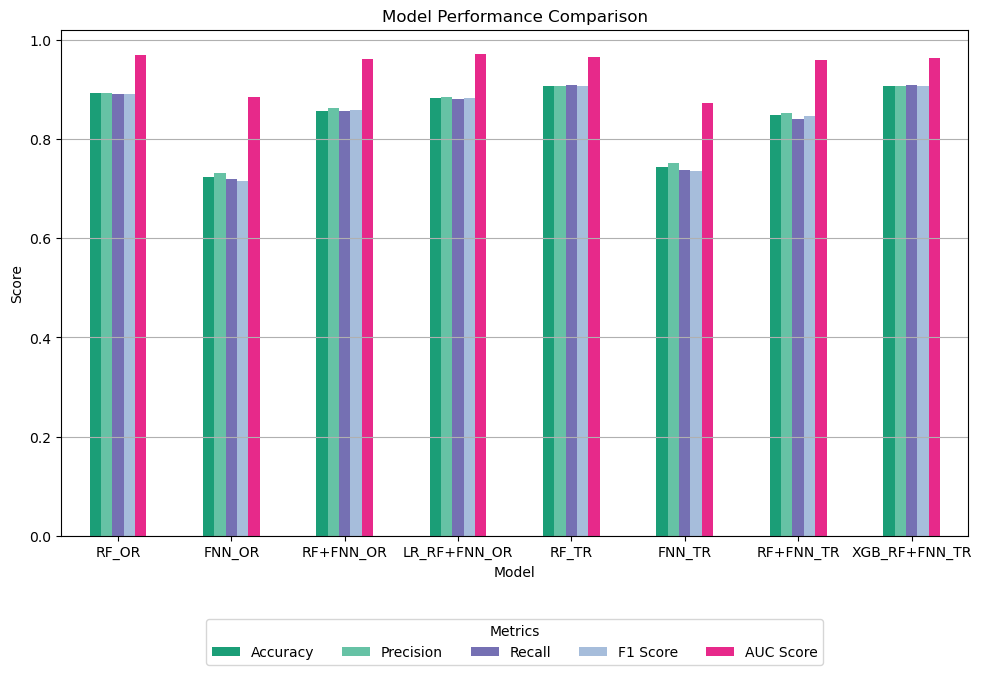

In [103]:
# Create DataFrame
df_metrics_all = pd.DataFrame(metrics_all)

# Set index for easier plotting
df_metrics_all.set_index('Model', inplace=True)

#set the colors
colors = ['#1b9e77', '#66c2a5', '#7570b3', '#a6bddb', '#e7298a'] 

# set the fig size
#plt.subplots(figsize=(10, 6))

# Plotting
ax = df_metrics_all.plot(kind='bar', figsize=(10,6),color=colors)

#set labels and titles
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Performance Comparison')

# rotate x-axis
plt.xticks(rotation=0)

#Add gridlines to y-axis
plt.grid(axis='y')

# Adjust layout for better spacing
plt.tight_layout()

#Move the legend below the x-axis
plt.legend(title='Metrics', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(df_metrics_all.columns))

#show plot
plt.show();

In [104]:
df_metrics_all

,Accuracy,Precision,Recall,F1 Score,AUC Score
Model,,,,,
RF_OR,0.891626,0.892363,0.890688,0.891270,0.969339
FNN_OR,0.724138,0.732130,0.719137,0.714497,0.883876
RF+FNN_OR,0.857143,0.862862,0.855637,0.858725,0.961580
LR_RF+FNN_OR,0.881773,0.883785,0.880738,0.882133,0.971442
RF_TR,0.906404,0.905961,0.907784,0.906620,0.963927
FNN_TR,0.743842,0.752284,0.737092,0.735748,0.873164
RF+FNN_TR,0.847291,0.852645,0.840710,0.845366,0.958464
XGB_RF+FNN_TR,0.906404,0.905961,0.907784,0.906620,0.963555


***Observation on the results*** 
- Models trained on the transformed data outperformed those trained on the original data
- Random Forest with default parameters trained on the transformed data has the same result with xgb classifier with optimized parameter trained on the ensemble predictions of the Random Forest and FNN.

### 6.2. Further evaluation 

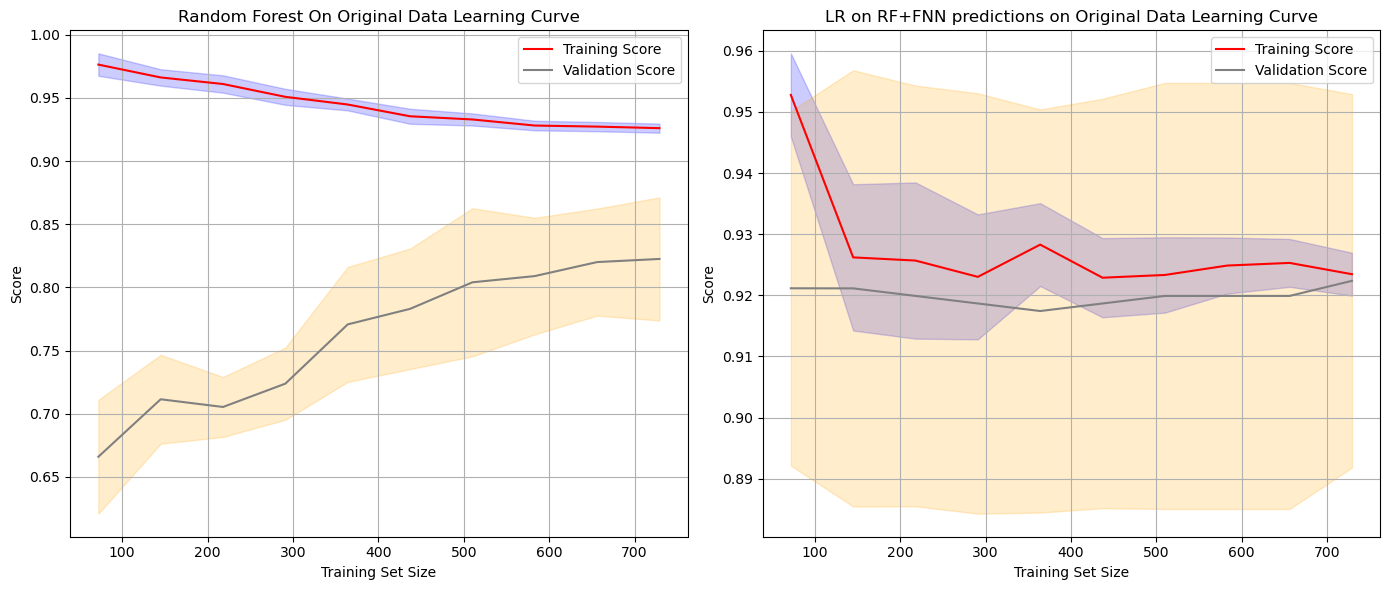

In [105]:
# plot learning curve to understand how the models performed across different folds in our transformed data

# Generate learning curves for Random Forest
train_sizes_rf_or, train_scores_rf_or, val_scores_rf_or = learning_curve(model_rf_or, X_train_or, y_train, 
                                                                cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), 
                                                                n_jobs=-1, 
                                                                train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Generate learning curves for Feedforward Neural Network
train_sizes_lr, train_scores_lr, val_scores_lr = learning_curve(final_model_meta, X_train_meta_or,
                                                                   y_train_meta_or,
                                                                   cv=StratifiedKFold(n_splits=10, 
                                                                                      shuffle=True, random_state=42), 
                                                                   n_jobs=-1, 
                                                                   train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Calculate mean and standard deviation for training and validation scores
train_mean_rf_or = np.mean(train_scores_rf_or, axis=1)
train_std_rf_or = np.std(train_scores_rf_or, axis=1)
val_mean_rf_or = np.mean(val_scores_rf_or, axis=1)
val_std_rf_or = np.std(val_scores_rf_or, axis=1)

train_mean_lr = np.mean(train_scores_lr, axis=1)
train_std_lr = np.std(train_scores_lr, axis=1)
val_mean_lr = np.mean(val_scores_lr, axis=1)
val_std_lr = np.std(val_scores_lr, axis=1)

# Plotting the learning curves in subplots
plt.figure(figsize=(14, 6))

# Random Forest Learning Curve
plt.subplot(1, 2, 1)
plt.plot(train_sizes_rf_or, train_mean_rf_or, label='Training Score', color='red')
plt.plot(train_sizes_rf_or, val_mean_rf_or, label='Validation Score', color='gray')
plt.fill_between(train_sizes_rf_or, train_mean_rf_or - train_std_rf_or, train_mean_rf_or + train_std_rf_or, color='blue', 
                 alpha=0.2)
plt.fill_between(train_sizes_rf_or, val_mean_rf_or - val_std_rf_or, val_mean_rf_or + val_std_rf_or, color='orange', alpha=0.2)
plt.title('Random Forest On Original Data Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()

# LR on RF+FNN Predictions Learning Curve
plt.subplot(1, 2, 2)
plt.plot(train_sizes_lr, train_mean_lr, label='Training Score', color='red')
plt.plot(train_sizes_lr, val_mean_lr, label='Validation Score', color='gray')
plt.fill_between(train_sizes_lr, train_mean_lr - train_std_lr, train_mean_lr + train_std_lr, color='blue', alpha=0.2)
plt.fill_between(train_sizes_lr, val_mean_lr - val_std_lr, val_mean_lr + val_std_lr, color='orange', alpha=0.2)
plt.title('LR on RF+FNN predictions on Original Data Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

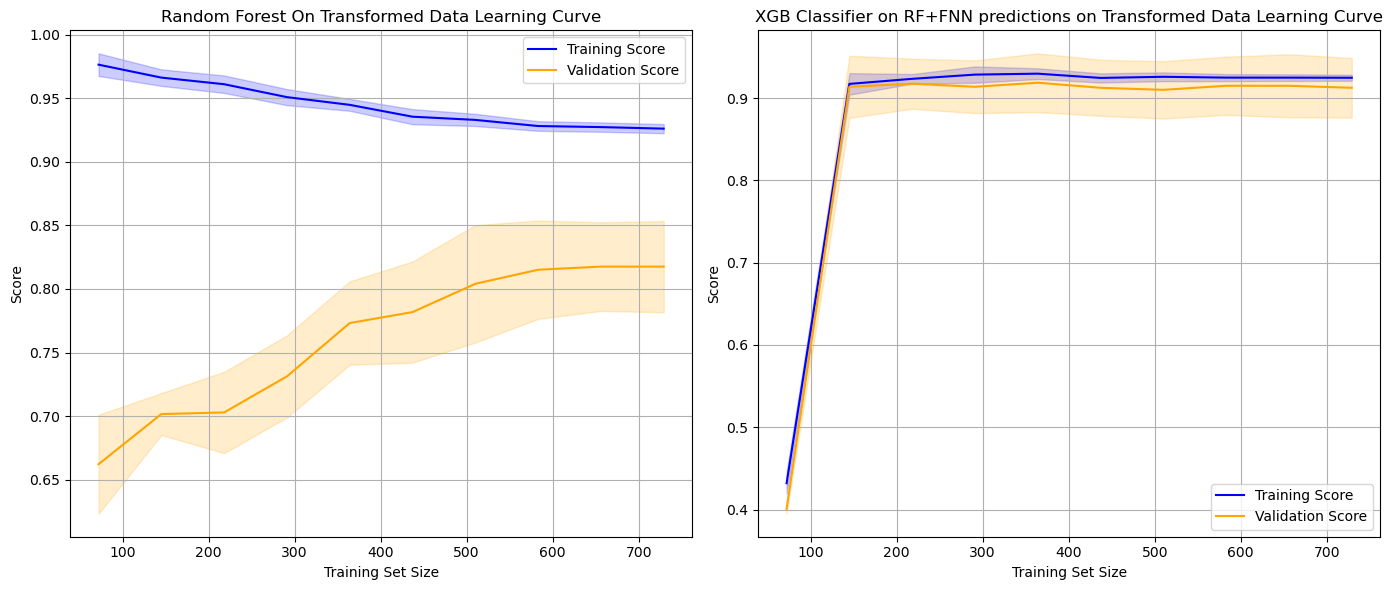

In [106]:
# plot learning curve to understand how the models performed across different folds in our transformed data

# Generate learning curves for Random Forest
train_sizes_rf, train_scores_rf, val_scores_rf = learning_curve(rf_default, X_train_tr_sca, y_train_tr, 
                                                                cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42), 
                                                                n_jobs=-1, 
                                                                train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Generate learning curves for Feedforward Neural Network
train_sizes_xgb, train_scores_xgb, val_scores_xgb = learning_curve(final_model_xgb, X_train_meta_tr,
                                                                   y_train_meta_tr,
                                                                   cv=StratifiedKFold(n_splits=10, 
                                                                                      shuffle=True, random_state=42), 
                                                                   n_jobs=-1, 
                                                                   train_sizes=np.linspace(0.1, 1.0, 10), random_state=42)

# Calculate mean and standard deviation for training and validation scores
train_mean_rf = np.mean(train_scores_rf, axis=1)
train_std_rf = np.std(train_scores_rf, axis=1)
val_mean_rf = np.mean(val_scores_rf, axis=1)
val_std_rf = np.std(val_scores_rf, axis=1)

train_mean_xgb = np.mean(train_scores_xgb, axis=1)
train_std_xgb = np.std(train_scores_xgb, axis=1)
val_mean_xgb = np.mean(val_scores_xgb, axis=1)
val_std_xgb = np.std(val_scores_xgb, axis=1)

# Plotting the learning curves in subplots
plt.figure(figsize=(14, 6))

# Random Forest Learning Curve
plt.subplot(1, 2, 1)
plt.plot(train_sizes_rf, train_mean_rf, label='Training Score', color='blue')
plt.plot(train_sizes_rf, val_mean_rf, label='Validation Score', color='orange')
plt.fill_between(train_sizes_rf, train_mean_rf - train_std_rf, train_mean_rf + train_std_rf, color='blue', alpha=0.2)
plt.fill_between(train_sizes_rf, val_mean_rf - val_std_rf, val_mean_rf + val_std_rf, color='orange', alpha=0.2)
plt.title('Random Forest On Transformed Data Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()

# XGB on RF+FNN Predictions Learning Curve
plt.subplot(1, 2, 2)
plt.plot(train_sizes_xgb, train_mean_xgb, label='Training Score', color='blue')
plt.plot(train_sizes_xgb, val_mean_xgb, label='Validation Score', color='orange')
plt.fill_between(train_sizes_xgb, train_mean_xgb - train_std_xgb, train_mean_xgb + train_std_xgb, color='blue', alpha=0.2)
plt.fill_between(train_sizes_xgb, val_mean_xgb - val_std_xgb, val_mean_xgb + val_std_xgb, color='orange', alpha=0.2)
plt.title('XGB Classifier on RF+FNN predictions on Transformed Data Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.legend(loc='best')
plt.grid()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

***Observation on the plotted Learning Curve***
- Random Forest:  The steady increase in the CV score as more data is added shows that our model is generalizing well to unseen data. But the difference between the cv and training score is wide suggesting that our model is overfitting of the training set.
- XGB Classifer: The plot suggest that our cv score gradually learns the pattern and as some point, flattens out. This gradually learning which marches the training score shows that our model is robust and has no sign of overfitting or underfitting.

Hence our selected model for this study is a meta model(XGB) trained on the ensembled predictions of RF and FNN using the transformed data

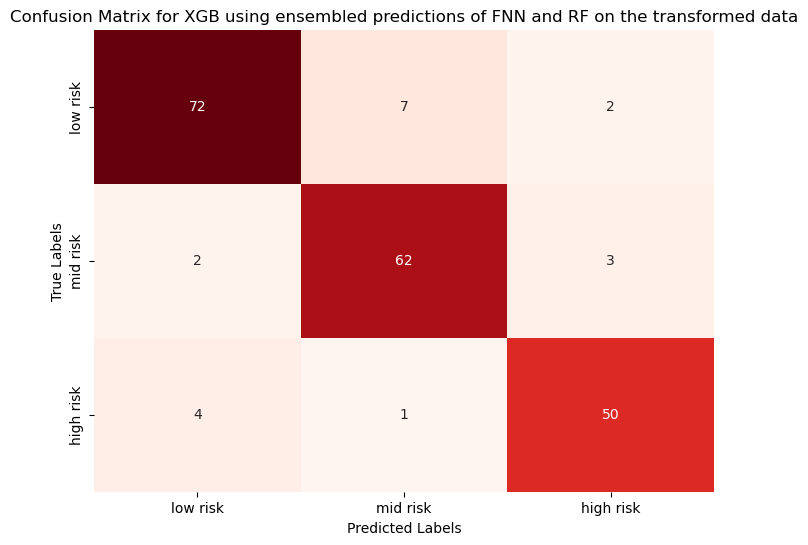

In [107]:
# Plot the confusion matrix of the final selected model

cm_xgb = confusion_matrix(y_test_tr, y_pred_meta_tr)

# Plot the confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Reds', cbar=False, xticklabels=risk_map.keys(), yticklabels=risk_map.keys())
plt.title('Confusion Matrix for XGB using ensembled predictions of FNN and RF on the transformed data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

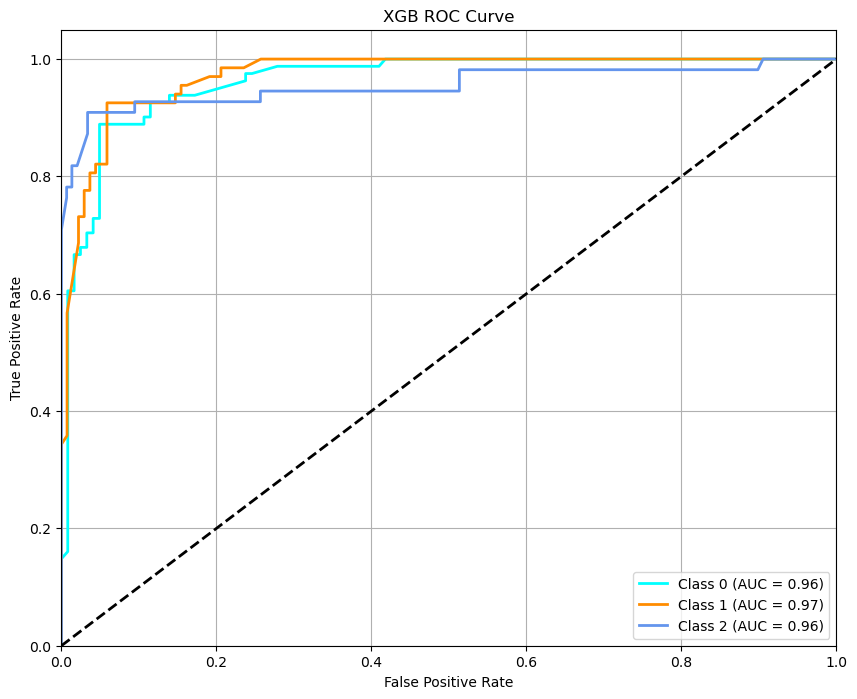

In [108]:
from itertools import cycle

# plot the ROC_AUC score
# Select probabilities for the positive class
xgb_prob = final_model_xgb.predict_proba(X_test_meta_tr)

# Binarize the output labels
y_test_tr_bin = label_binarize(y_test_tr, classes=np.unique(y_test_tr))
n_classes = y_test_tr_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_tr_bin[:, i], xgb_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(10, 8))

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line for random guess
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGB ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


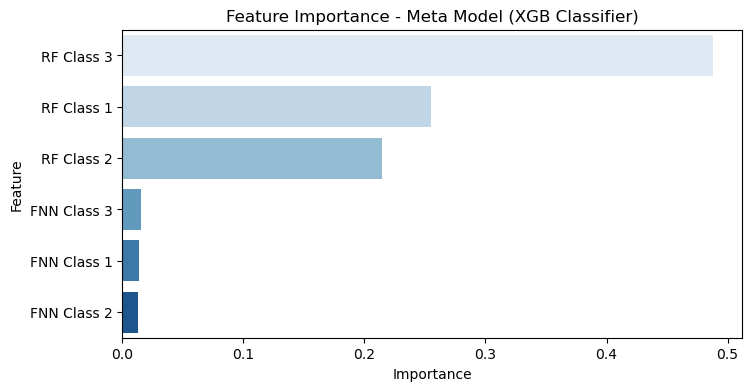

In [109]:
# plot feature importance

# Extract feature importances from the XGB model
meta_feature_importances = final_model_xgb.feature_importances_

# Feature names
feature_names = ['RF Class 1', 'RF Class 2', 'RF Class 3',
                  'FNN Class 1', 'FNN Class 2', 'FNN Class 3']

# Create a DataFrame for plotting
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': meta_feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='Blues')
plt.title('Feature Importance - Meta Model (XGB Classifier)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

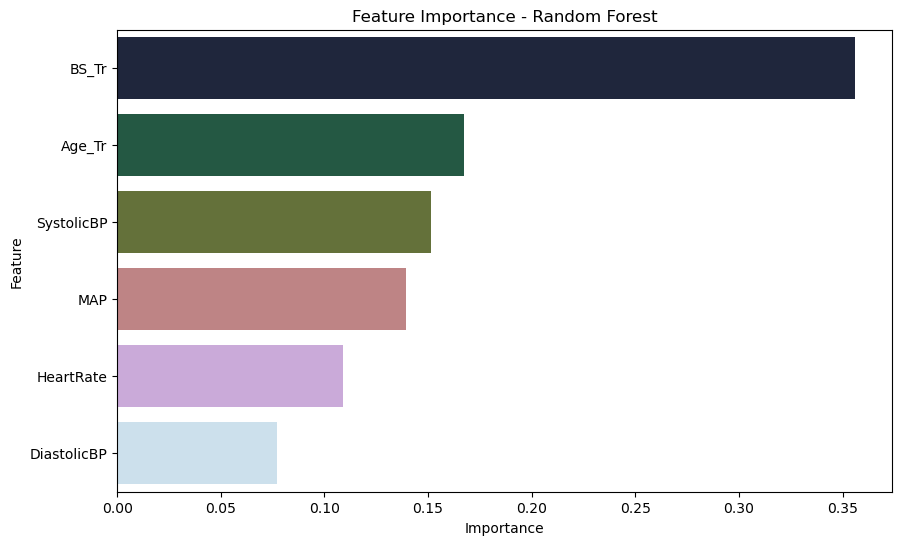

In [110]:
# plot feature importance of the RF used on the transformed data
# Get feature importances from the RF model
feature_imp = rf_default.feature_importances_

# Create a DataFrame for easier plotting
features_df = pd.DataFrame({
    'Feature': X_tr.columns,
    'Importance': feature_imp
})

# Sort the DataFrame by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=features_df, palette='cubehelix')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
